# Business Understanding / Objective

## ANAYLZING ONLINE SHOPPER'S INTENTIONS AND FIGURING OUT DIFFERENT CUSTOMER SEGMENTS

# Steps to be followed in this Notebook

1- EDA

    i-  Importing Libraries
    
    ii- Reading Data
    
    iii-Information about Data and Features
    
    iv- Data Preprocessing
    
    v-  Outlier Detection (Necessary)
    
2- Data Visualization

    i-  Boxplots of Features with Revenue
    
    ii- Barplots of Categorical Features
    
    iii-Pie Plots
    
    iv- Stacked Bar Plots with Revenue
    
    v-Multivariate Boxplots w.r.t. Revenue
    
3- Correlation

    i- Heatmap
    
    ii-Pairplot

4- Clustering Algorithms

    i- Elbow Method
    
    ii- K-Means
    
    iii-MiniBatch K-Means
    
    iv-Meanshift
    
    v-DBScan
    
    vi-Affinity Propagation
    
    vii-OPTICS
    
5- Comparasion Table

6- Where does most of the customers visiting the website belonging to?

    i- Traffic Type vs Region
    
    ii- Administrative Duration vs Region
    
    iii- Informational Duration vs Region
    
    iv- Product Related Duration vs Region
    
    v- Page Values vs Region
    
7- How does longer duration spent on the website affect the bounce rate?

    i- Administrative Duration vs Bounce Rates
    
    ii-Informational Duration vs Bounce Rates
    
    iii-Product Related Duration vs Bounce Rates

8- How would you differentiate between serious and non-serious customers?

9- How does exit rate affect revenue? 

10- What is the effect of Traffic type on Revenue? 


# 1- Exploratory Data Analysis

##    i- Importing Necessary Libraries

In [1]:
#importing modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets 
from sklearn.metrics import davies_bouldin_score 
from sklearn.metrics import adjusted_mutual_info_score, silhouette_score
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import adjusted_mutual_info_score

##    ii- Reading Data

In [2]:
#Load Dataset
osi= pd.read_csv("C:/Users/Hassan Ahmed/Desktop/Data Science Cohort-1 FTI/online_shoppers_intention.csv")
print (osi.columns)
osi.head(10)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


## iii- Information Related to Attributes
* "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

* The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 

* The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

* The value of "Exit Rate" feature for a specific web page is calculated as for all page views to the page, the percentage that were the last in the session. 

* The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

* The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

* The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor,  a Boolean value indicating whether the date of the visit is weekend, and month of the year.   

In [3]:
#Some data Stats
print(osi.shape) # Shape
osi.info() # information
osi.describe() #Summary Stastics

(12330, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [4]:
#Looking out for missing values and handling them
osi.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [5]:
osi.dropna(inplace=True)

## iv- Data Preprocessing

In [6]:
X=osi.copy()
Y=osi["Revenue"].copy()

In [7]:
numerical = ['Administrative','Administrative_Duration','Informational',"Informational_Duration","ProductRelated",
             "ProductRelated_Duration","BounceRates","ExitRates","PageValues","SpecialDay"]
x=X[numerical]

print(x.shape)
x.head()

(12316, 10)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0


## v- Outlier Detection

In [9]:
from scipy import stats
z=np.abs(stats.zscore(x))
outliers=np.where(z>3.5)
normal_z=x[(z<3.5).all(axis=1)]
normal_z.shape

(10232, 10)

In [10]:
normal_z.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4


In [11]:
osi.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [12]:
#finding out unique variables
print("OperatingSystems : ",osi.OperatingSystems.unique())
print("Browser : ",osi.Browser.unique())
print("Region : ",osi.Region.unique())
print("TrafficType: ",osi['TrafficType'].unique())
print("VisitorType: ",osi['VisitorType'].unique())

OperatingSystems :  [1 2 4 3 7 6 8 5]
Browser :  [ 1  2  3  4  5  6  7 10  8  9 12 13 11]
Region :  [1 9 2 3 4 5 6 7 8]
TrafficType:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]
VisitorType:  ['Returning_Visitor' 'New_Visitor' 'Other']


In [13]:
osi["Revenue"]=osi["Revenue"].astype("str")
osi["Revenue"]=osi["Revenue"].replace(["False","True"],[0,1])
osi["Revenue"].value_counts()

0    10408
1     1908
Name: Revenue, dtype: int64

In [14]:
categorical = ["Month",'OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend']
for cat in categorical:
    osi[cat]=pd.Categorical(osi[cat])

# 2) Data Visualization

## i- Boxplots of Features against Revenue

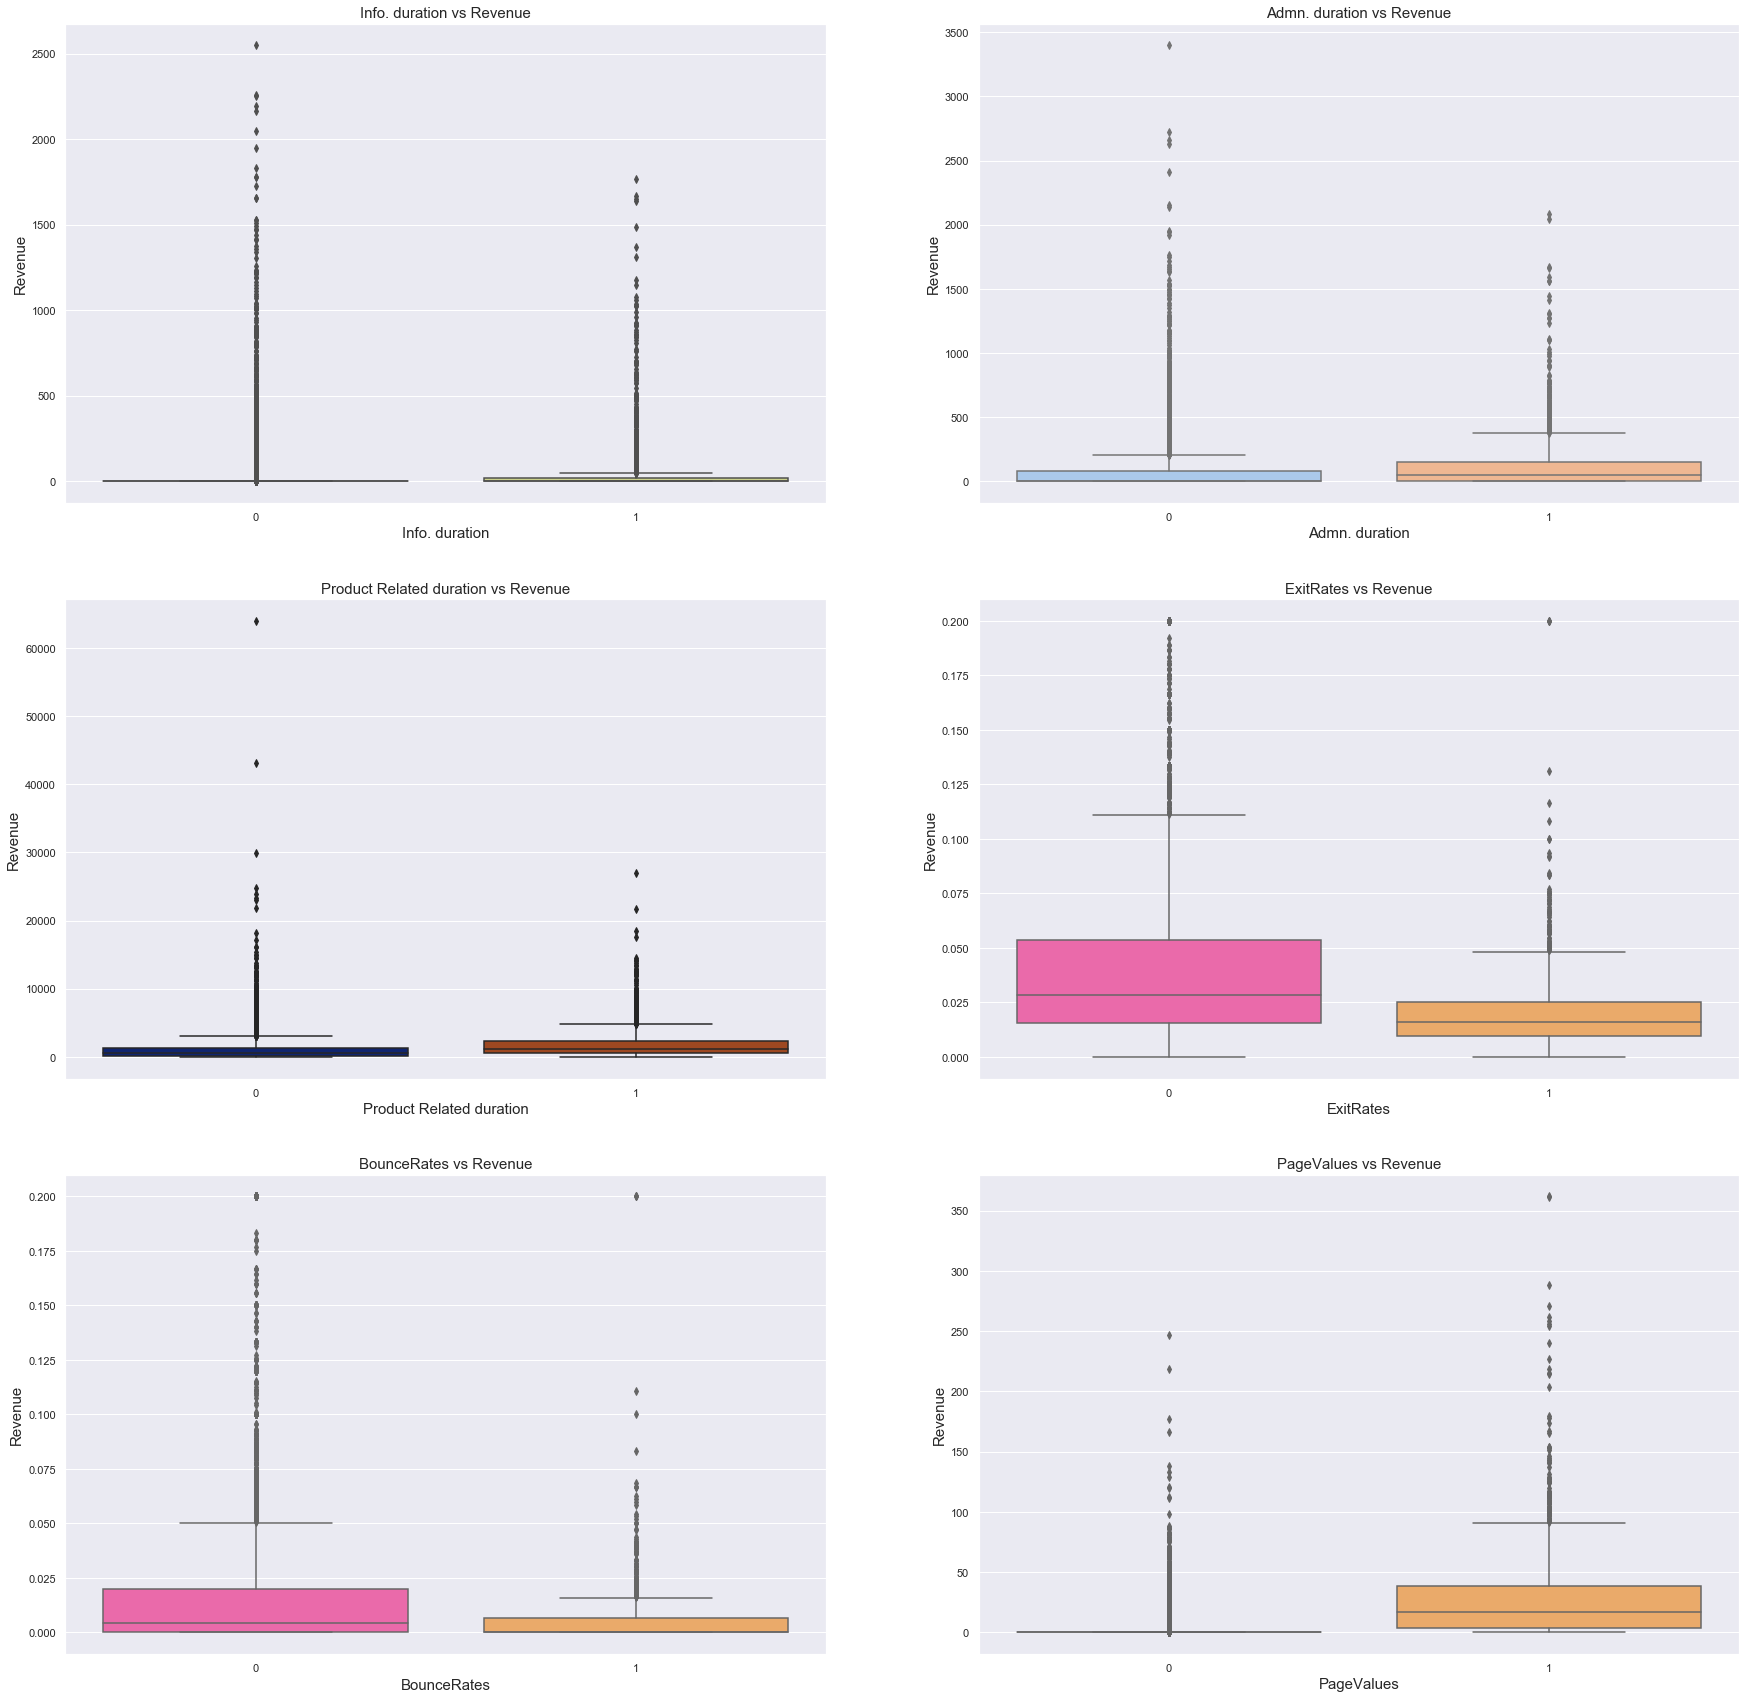

In [70]:
# product related duration vs revenue

plt.rcParams['figure.figsize'] = (30, 30)

plt.subplot(3, 2, 1)
sns.boxplot(osi['Revenue'], x['Informational_Duration'], palette = 'rainbow')
plt.title('Info. duration vs Revenue', fontsize = 15)
plt.xlabel('Info. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(3, 2, 2)
sns.boxplot(osi['Revenue'], x['Administrative_Duration'], palette = 'pastel')
plt.title('Admn. duration vs Revenue', fontsize = 15)
plt.xlabel('Admn. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(3, 2, 3)
sns.boxplot(osi['Revenue'], x['ProductRelated_Duration'], palette = 'dark')
plt.title('Product Related duration vs Revenue', fontsize = 15)
plt.xlabel('Product Related duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# exit rate vs revenue

plt.subplot(3, 2, 4)
sns.boxplot(osi['Revenue'], x['ExitRates'], palette = 'spring')
plt.title('ExitRates vs Revenue', fontsize = 15)
plt.xlabel('ExitRates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# Bounce rates vs revenue
plt.subplot(3, 2, 5)
sns.boxplot(osi['Revenue'], x['BounceRates'], palette = 'spring')
plt.title('BounceRates vs Revenue', fontsize = 15)
plt.xlabel('BounceRates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# Page Values vs revenue
plt.subplot(3, 2, 6)
sns.boxplot(osi['Revenue'], x['PageValues'], palette = 'spring')
plt.title('PageValues vs Revenue', fontsize = 15)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)


plt.show()


We plotted these to see the some important numerical values distribution against Revenue and how they are classified

## ii- Barplots of Categorical Features

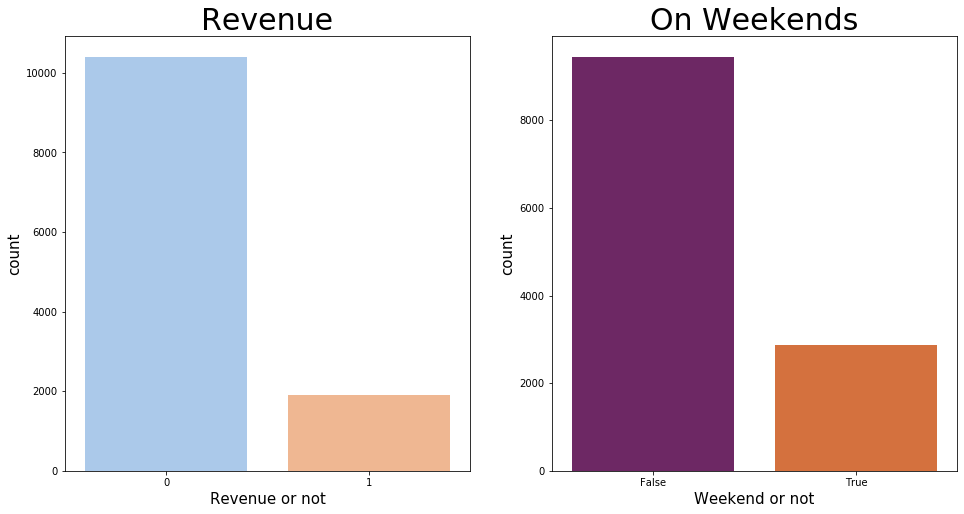

In [16]:
# Revenue Count
plt.rcParams['figure.figsize'] = (16, 8)
plt.subplot(1, 2, 1)
sns.countplot(osi['Revenue'], palette = 'pastel')
plt.title('Revenue', fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(osi['Weekend'], palette = 'inferno')
plt.title('On Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

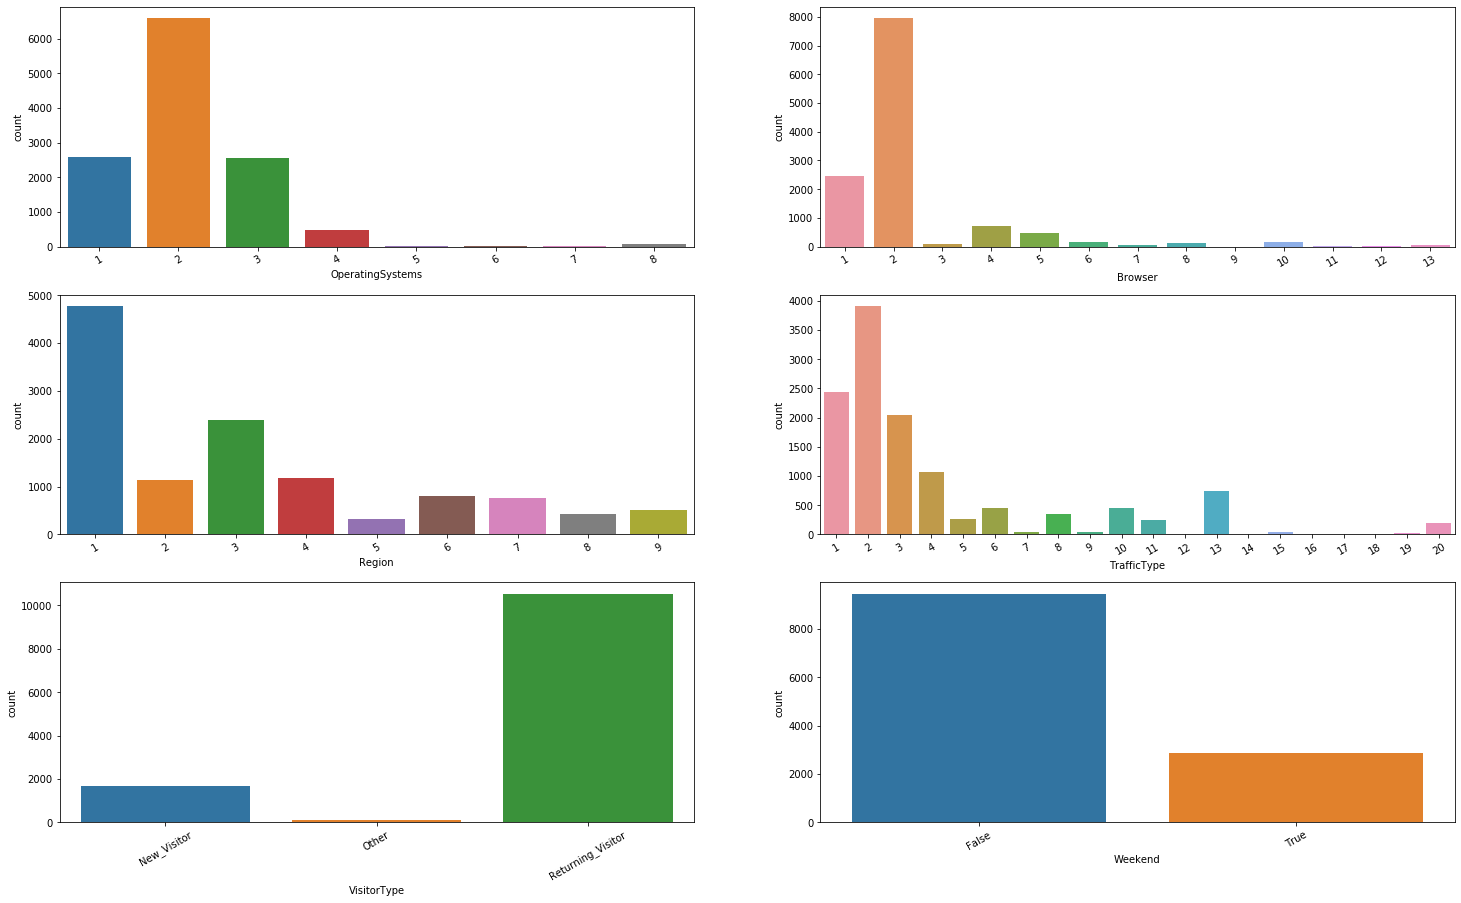

In [18]:
categorical = ['OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend']
fig = plt.figure(figsize = (25,15))
axes = 320
for cat in categorical:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = osi, x = cat)
    plt.xticks(rotation=30)
plt.show()

we plotted these to see the counts or frequency of all categorical features

## iii- Pie Plots

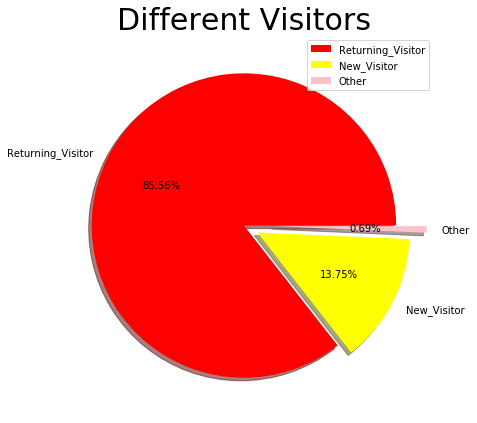

In [17]:
plt.rcParams['figure.figsize'] = (18, 7)
size = list(osi["VisitorType"].value_counts().values)
colors = ['red', 'yellow', 'pink']
labels = list(osi["VisitorType"].value_counts().index)
explode = [0, 0.1, 0.2]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()

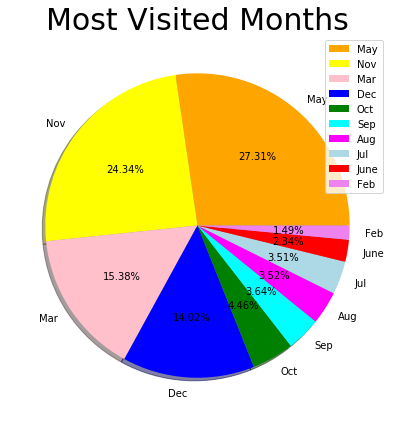

In [19]:
plt.rcParams['figure.figsize'] = (18, 7)
size = list(osi["Month"].value_counts().values)
colors = ['orange', 'yellow', 'pink', 'blue', 'green', 'cyan', 'magenta', 'lightblue', 'red', 'violet']
labels = list(osi["Month"].value_counts().index)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Most Visited Months', fontsize = 30)
plt.axis('off')
plt.legend()

We plotted these to see frequency in terms of percentage and Pie plot of some categorical features

## iv- Stacked Bar Plots with Revenue

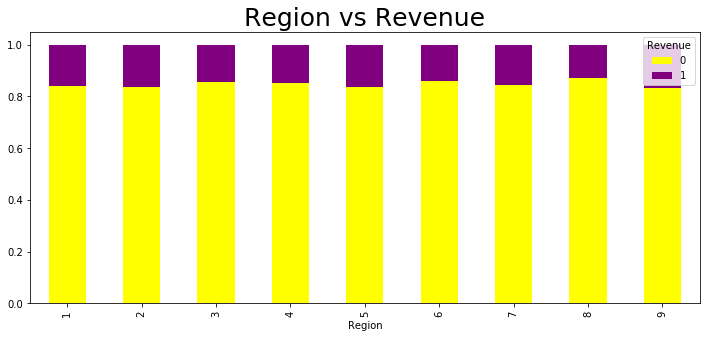

In [21]:
# region vs Revenue
df = pd.crosstab(osi['Region'], osi['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (12, 5), color = ['yellow', 'purple'])
plt.title('Region vs Revenue', fontsize = 25)
plt.show()

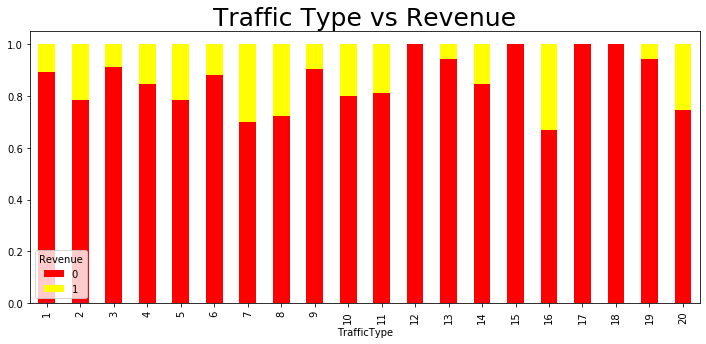

In [22]:
# Traffic Type vs Revenue
df = pd.crosstab(osi['TrafficType'], osi['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (12, 5), color = ['red', 'yellow'])
plt.title('Traffic Type vs Revenue', fontsize = 25)
plt.show()

* As we can see Traffic Type 6,7,8,10,11,16 & 20 are generating big revenue so the are classified as our target customers.

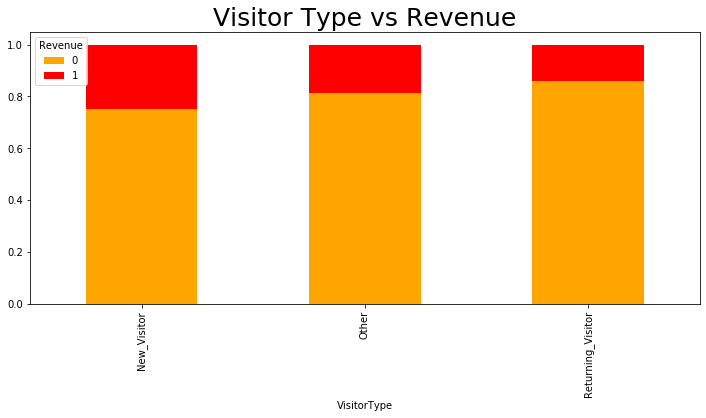

In [23]:
# visitor type vs revenue
df = pd.crosstab(osi['VisitorType'], osi['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (12, 5), color = ['orange', 'red'])
plt.title('Visitor Type vs Revenue', fontsize = 25)
plt.show()

We plotted these to see how some categorical feature's categories are classified against Revenue

## v- Multivariate Boxplots w.r.t. Revenue

Text(0.5, 1.0, 'Visitors vs Bounce Rates w.r.t. Revenue')

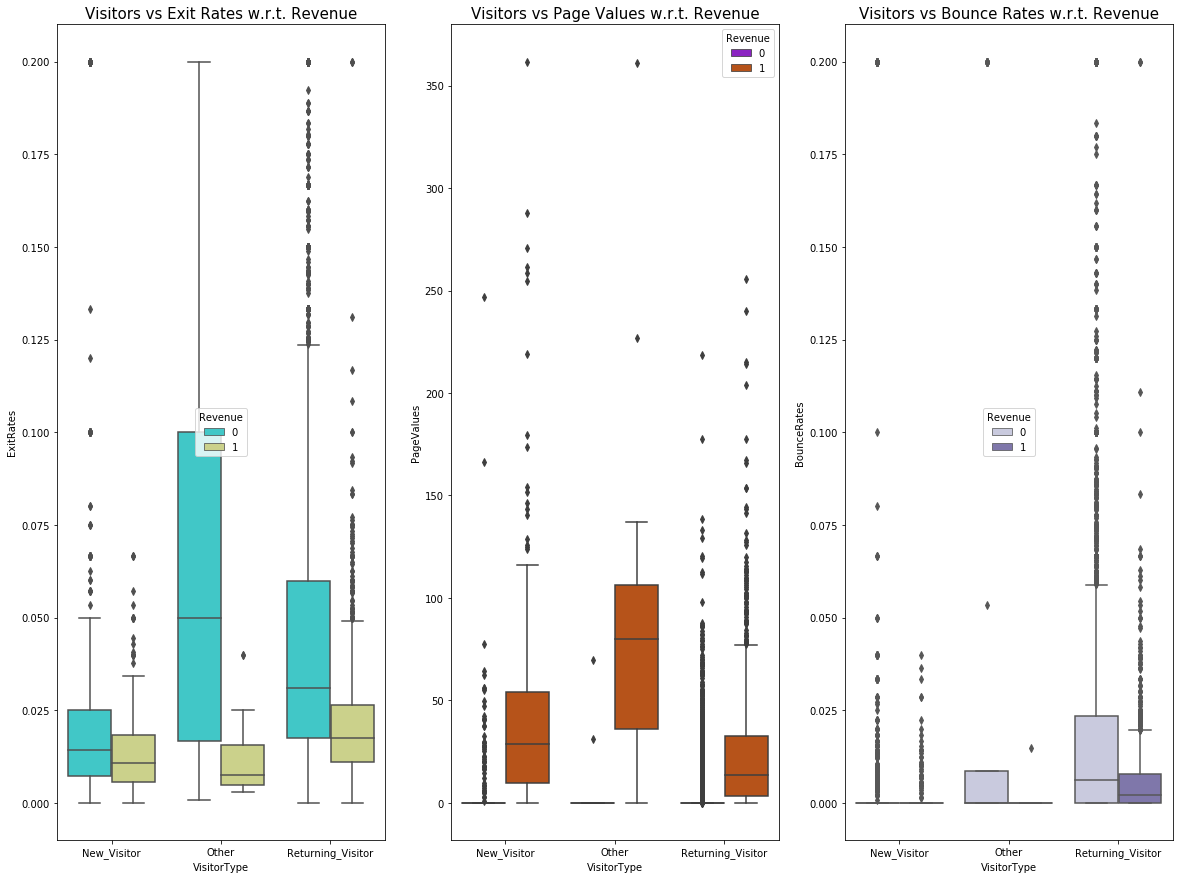

In [24]:
# visitor type vs exit rates w.r.t revenue
plt.rcParams['figure.figsize'] = (20, 15)
plt.subplot(1, 3, 1)
sns.boxplot(x = osi['VisitorType'], y = osi['ExitRates'], hue = osi['Revenue'], palette = 'rainbow')
plt.title('Visitors vs Exit Rates w.r.t. Revenue', fontsize = 15)

# visitor type vs exit rates w.r.t revenue
plt.subplot(1, 3, 2)
sns.boxplot(x = osi['VisitorType'], y = osi['PageValues'], hue = osi['Revenue'], palette = 'gnuplot')
plt.title('Visitors vs Page Values w.r.t. Revenue', fontsize = 15)
# visitor type vs exit rates w.r.t revenue
plt.subplot(1, 3, 3)
sns.boxplot(x = osi['VisitorType'], y = osi['BounceRates'], hue = osi['Revenue'], palette = 'Purples')
plt.title('Visitors vs Bounce Rates w.r.t. Revenue', fontsize = 15)


* As we can see that New and Other Visitor Types have very low exit and bounce rates so they can be categorized as serious or target customers.


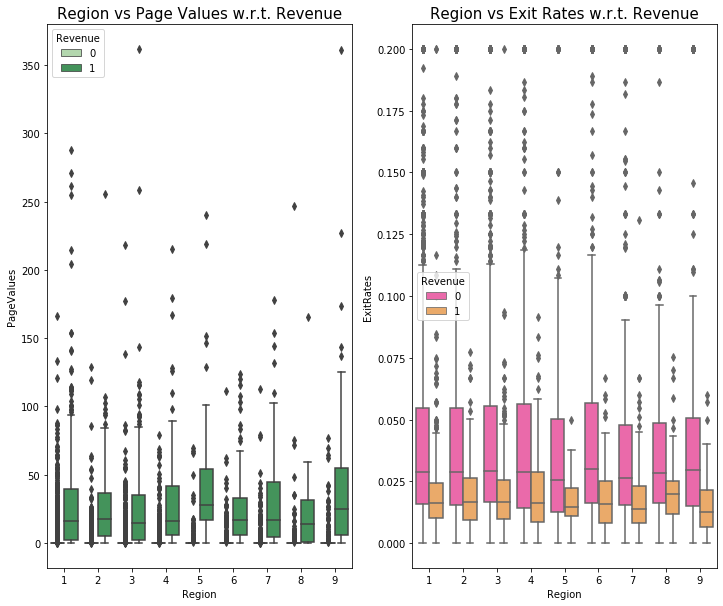

In [25]:
# region vs pagevalues w.r.t. revenue
plt.rcParams['figure.figsize'] = (12, 10)
plt.subplot(1, 2, 1)
sns.boxplot(x = osi['Region'], y = osi['PageValues'], hue = osi['Revenue'], palette = 'Greens')
plt.title('Region vs Page Values w.r.t. Revenue', fontsize = 15)

#region vs exit rates w.r.t. revenue
plt.subplot(1, 2, 2)
sns.boxplot(x = osi['Region'], y = osi['ExitRates'], hue = osi['Revenue'], palette = 'spring')
plt.title('Region vs Exit Rates w.r.t. Revenue', fontsize = 15)
plt.show()

We plotted these to see how some numeric values are distributed in some categorical features we also separated each category with respect to Revenue.

* Region 8 and 9 have the least exit rate so we can also classify them as serious or target customers

# 3) Correlation

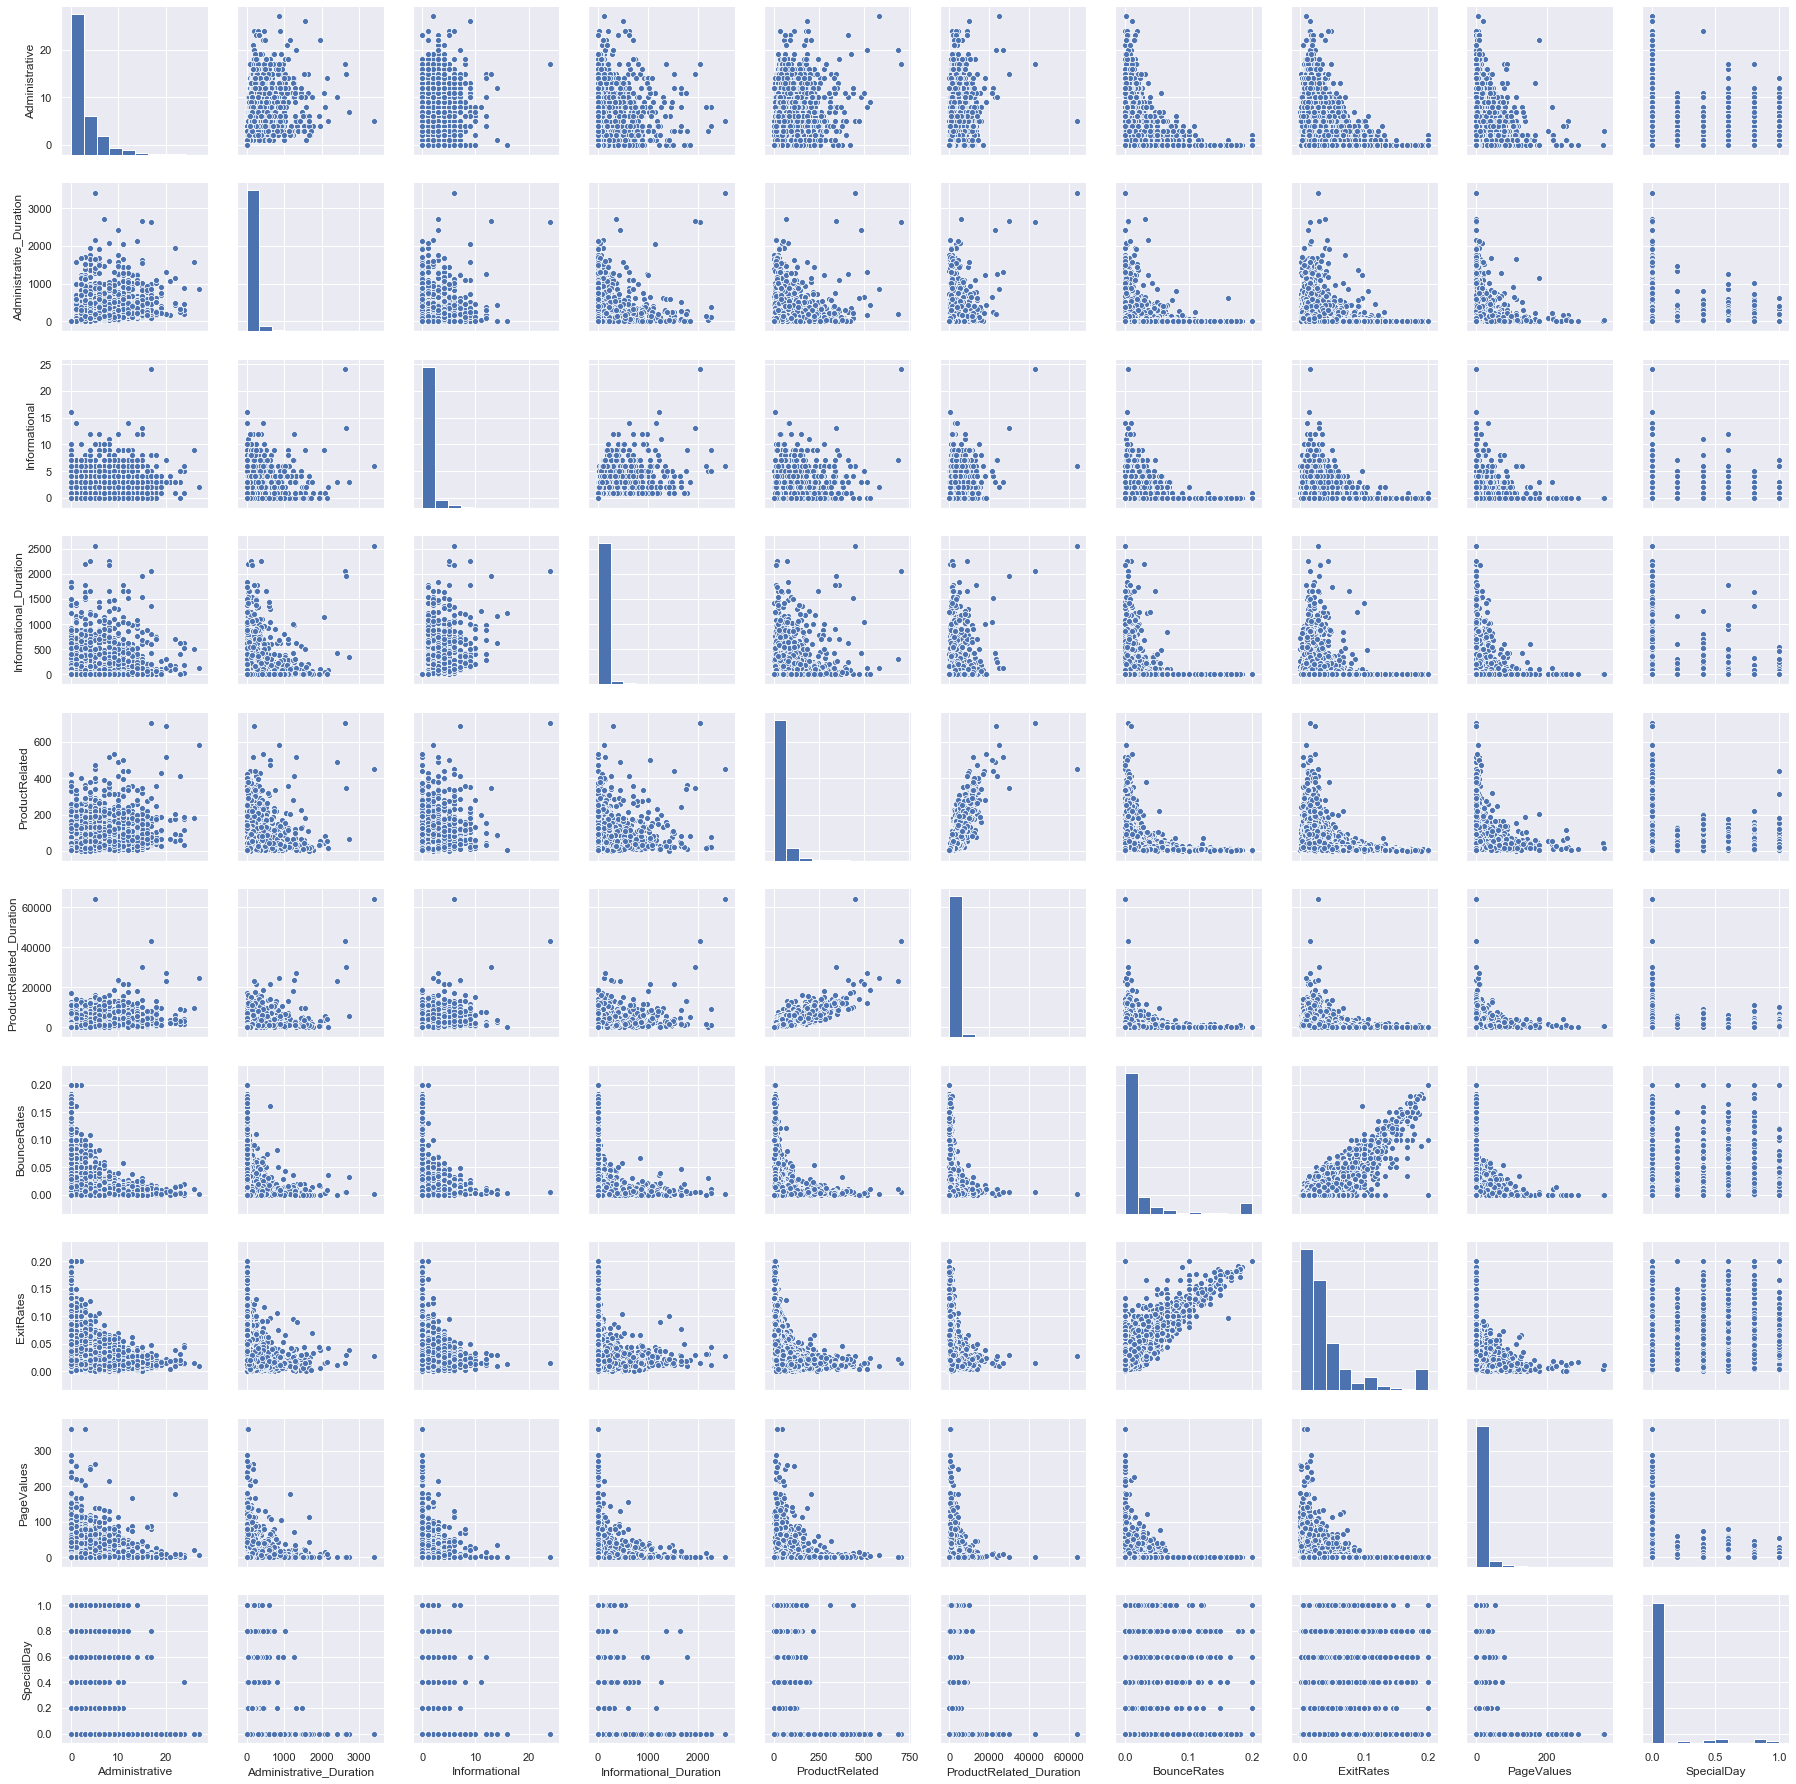

In [58]:
sns.pairplot(x)

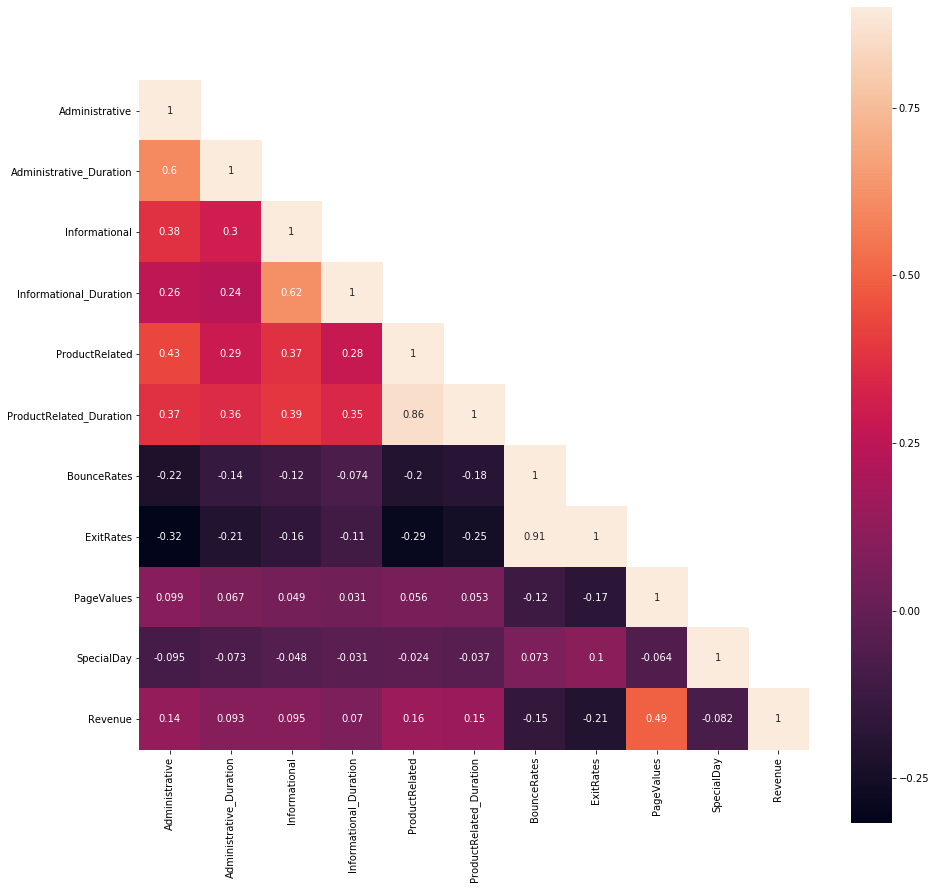

In [26]:
#create correlation
corr = osi.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

We used correlation to analyse the which features are most important and which are not.

# 4- Clustering Algorithms

## i) Elbow Method

C:\Users\Hassan Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


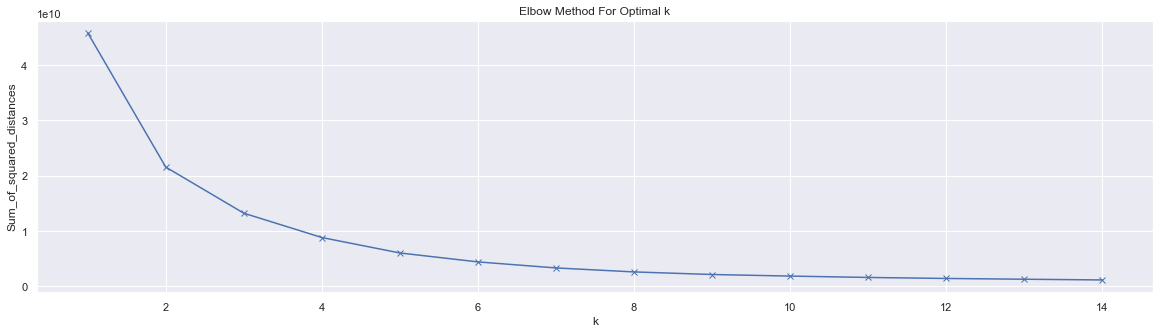

Sum of squared errors: [45790504503.82332, 21541256650.97603, 13210726715.370398, 8815961618.571474, 6026129243.960869, 4412625224.172697, 3322205226.8992376, 2602182384.2382064, 2135393684.0163596, 1852016422.677421, 1603634976.5613627, 1421691966.282803, 1282376730.2871635, 1152568984.0093632]


In [59]:
from sklearn.cluster import KMeans
matrix=x.as_matrix()
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(matrix)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
print("Sum of squared errors:", Sum_of_squared_distances)

## ii) K-Means

C:\Users\Hassan Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


DB for K Means:0.5560656379020684
Silhoutte Score for K Means:0.7813605562033761
Calinski Score for K Means:13862.015707724866
Adjusted mutual information score:0.013315267301365136
Homogeneity completeness v measure:(0.021548520716109625, 0.01340828616179606, 0.01653061351593899)
Number of estimated clusters : 2
K-Means


C:\Users\Hassan Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


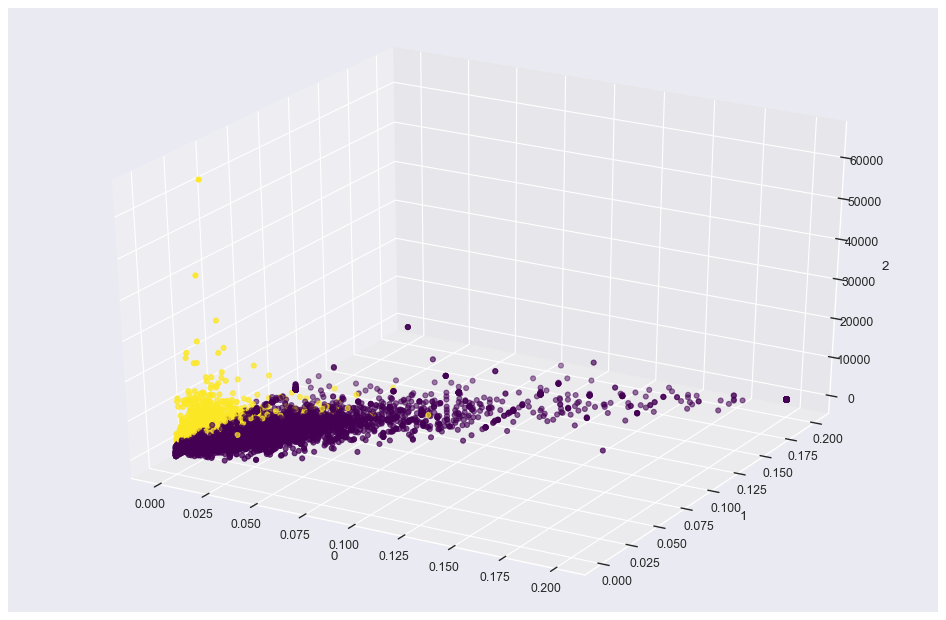

In [60]:
from sklearn.cluster import KMeans 
matrix=x.as_matrix()
model = KMeans(n_clusters=2)
model.fit(matrix)
kmeans_labels = model.labels_
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(matrix[:,6],matrix[:,7],matrix[:,5],c=kmeans_labels, cmap='viridis')

xLabel = ax.set_xlabel('0', linespacing=3.2)
yLabel = ax.set_ylabel('1', linespacing=3.1)
zLabel = ax.set_zlabel('2', linespacing=3.4)

#Internal Cluster Validation

print("DB for K Means:"+ str(davies_bouldin_score(matrix, kmeans_labels))) 
print("Silhoutte Score for K Means:"+ str(silhouette_score(matrix, kmeans_labels))) 
print("Calinski Score for K Means:"+ str(metrics.calinski_harabasz_score(matrix, kmeans_labels)))

# External Cluster Validation

print("Adjusted mutual information score:"+ str(adjusted_mutual_info_score(kmeans_labels, Y)))
print("Homogeneity completeness v measure:"+str(metrics.homogeneity_completeness_v_measure(kmeans_labels, Y)))

labels_unique=np.unique(kmeans_labels)
n_clusters_=len(labels_unique)
#print the labels of each data 
print("Number of estimated clusters : %d" % n_clusters_)

print("K-Means")


## iii) MiniBatch K-Means

C:\Users\Hassan Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


DB for MiniBatch K Means:0.5382996394426999
Silhoutte Score for MiniBatch K Means:0.7905657949520601
Calinski Score forMiniBatch K Means:13772.06374174096
Adjusted mutual information score:0.012145128547729691
Homogeneity completeness v measure:(0.02200920453336021, 0.012238276667062684, 0.015729900410772775)
Number of estimated clusters : 2
Mini Batch K-Means


C:\Users\Hassan Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


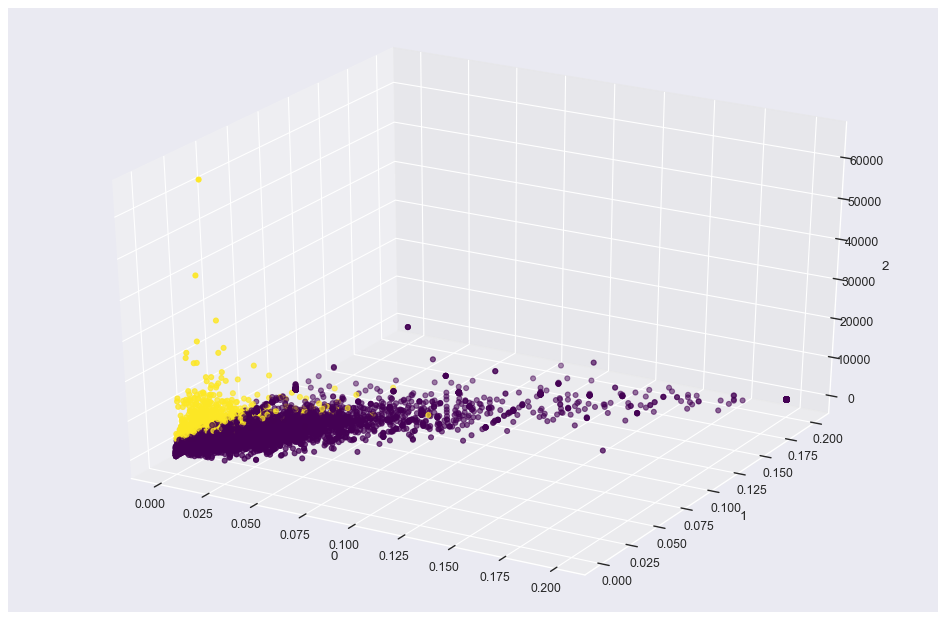

In [61]:
from sklearn.cluster import MiniBatchKMeans
from mpl_toolkits.mplot3d import Axes3D
matrix=x.as_matrix()
model = MiniBatchKMeans(n_clusters=2, init='k-means++', max_iter=100, batch_size=50)
model.fit(matrix)
mkmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(matrix[:,6],matrix[:,7],matrix[:,5],c=mkmeans_labels, cmap='viridis')

xLabel = ax.set_xlabel('0', linespacing=3.2)
yLabel = ax.set_ylabel('1', linespacing=3.1)
zLabel = ax.set_zlabel('2', linespacing=3.4)

#Internal Cluster Validation

print("DB for MiniBatch K Means:"+ str(davies_bouldin_score(matrix, mkmeans_labels))) 
print("Silhoutte Score for MiniBatch K Means:"+ str(silhouette_score(matrix, mkmeans_labels))) 
print("Calinski Score forMiniBatch K Means:"+ str(metrics.calinski_harabasz_score(matrix, mkmeans_labels)))

# External Cluster Validation

print("Adjusted mutual information score:"+ str(adjusted_mutual_info_score(mkmeans_labels, Y)))
print("Homogeneity completeness v measure:"+str(metrics.homogeneity_completeness_v_measure(mkmeans_labels, Y)))

labels_unique=np.unique(mkmeans_labels)
n_clusters_=len(labels_unique)
#print the labels of each data 
print("Number of estimated clusters : %d" % n_clusters_)


print("Mini Batch K-Means")

## iv) MeanShift

C:\Users\Hassan Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


DB for Meanshift:0.20334916998523322
Silhoutte Score for Meanshift:0.9399506239583691
Calinski Score for Meanshift:1501.0358226583508
Adjusted mutual information score:-0.00016047785975347416
Homogeneity completeness v measure:(0.002471394346508589, 3.245145650834897e-05, 6.406172940367802e-05)
Bandwidth is : 7798.656330833592
Number of estimated clusters : 3
Meanshift


C:\Users\Hassan Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


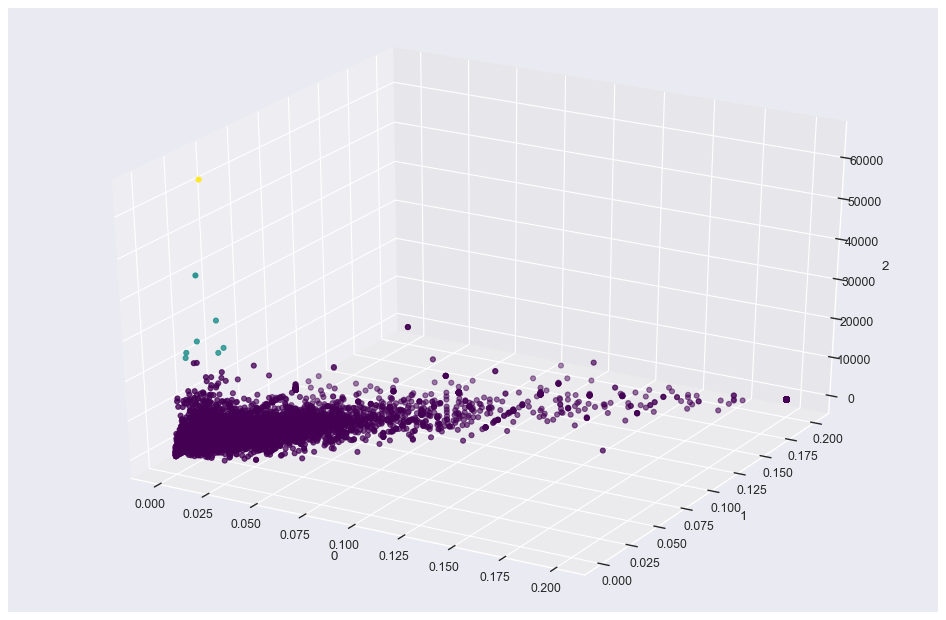

In [62]:
# Mean Shift Clustering
matrix=x.as_matrix()
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

bandwidth=estimate_bandwidth(matrix,quantile=0.99)


analyzer=MeanShift(bandwidth)
analyzer.fit(matrix)
ms_labels=analyzer.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(matrix[:,6],matrix[:,7],matrix[:,5],c=ms_labels, cmap='viridis')

xLabel = ax.set_xlabel('0', linespacing=3.2)
yLabel = ax.set_ylabel('1', linespacing=3.1)
zLabel = ax.set_zlabel('2', linespacing=3.4)
#Internal Cluster Validation
# External Cluster Validation
print("DB for Meanshift:"+ str(davies_bouldin_score(matrix, ms_labels))) 
print("Silhoutte Score for Meanshift:"+ str(silhouette_score(matrix, ms_labels))) 
print("Calinski Score for Meanshift:"+ str(metrics.calinski_harabasz_score(matrix, ms_labels)))

print("Adjusted mutual information score:"+ str(adjusted_mutual_info_score(ms_labels, Y)))
print("Homogeneity completeness v measure:"+str(metrics.homogeneity_completeness_v_measure(ms_labels, Y)))
print("Bandwidth is :",bandwidth)

labels_unique=np.unique(ms_labels)
n_clusters_=len(labels_unique)
#print the labels of each data 
print("Number of estimated clusters : %d" % n_clusters_)
print("Meanshift")

## v) Gaussian Mixture Model

C:\Users\Hassan Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


DB for  GMM:1.5818814234155707
Silhoutte Score for GMM:0.36970840375582026
Calinski Score for GMM:2120.4399795666873
Adjusted mutual information score:0.016165497767032147
Homogeneity completeness v measure:(0.016237782944307205, 0.020818319787413952, 0.01824494930946033)
Number of estimated clusters : 2
GMM


C:\Users\Hassan Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


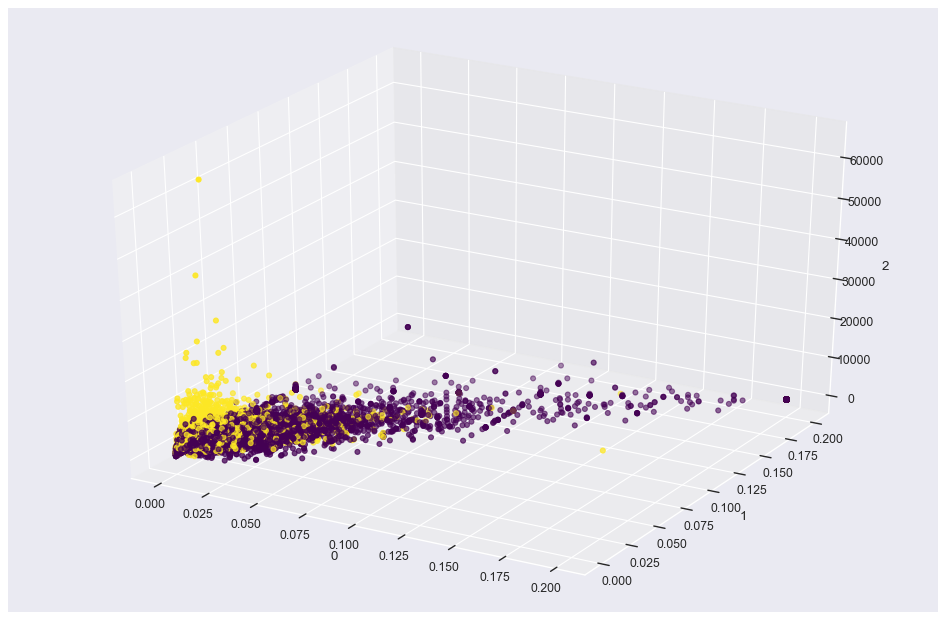

In [63]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture

matrix=x.as_matrix()
model = GaussianMixture(n_components=2, covariance_type='full', tol=0.001,random_state=42)
model.fit(matrix)
gmm_labels = model.predict(matrix)

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(matrix[:,6],matrix[:,7],matrix[:,5],c=gmm_labels, cmap='viridis')

xLabel = ax.set_xlabel('0', linespacing=3.2)
yLabel = ax.set_ylabel('1', linespacing=3.1)
zLabel = ax.set_zlabel('2', linespacing=3.4)

#Internal Cluster Validation

print("DB for  GMM:"+ str(davies_bouldin_score(matrix, gmm_labels))) 
print("Silhoutte Score for GMM:"+ str(silhouette_score(matrix, gmm_labels))) 
print("Calinski Score for GMM:"+ str(metrics.calinski_harabasz_score(matrix, gmm_labels)))

# External Cluster Validation

print("Adjusted mutual information score:"+ str(adjusted_mutual_info_score(gmm_labels, Y)))
print("Homogeneity completeness v measure:"+str(metrics.homogeneity_completeness_v_measure(gmm_labels, Y)))

labels_unique=np.unique(gmm_labels)
n_clusters_=len(labels_unique)
#print the labels of each data 
print("Number of estimated clusters : %d" % n_clusters_)


print("GMM")

## vi) DBSCAN

C:\Users\Hassan Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


DB for DBSCAN:0.9127481742270394
Silhoutte Score for DBSCAN:-0.272657104280102
Calinski Score for DBSCAN:61.807509144621406
Adjusted mutual information score:0.017489170803560623
Homogeneity completeness v measure:(0.033431998022842614, 0.017871504849864207, 0.02329198130148491)
Number of estimated clusters : 5
DBSCAN


C:\Users\Hassan Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


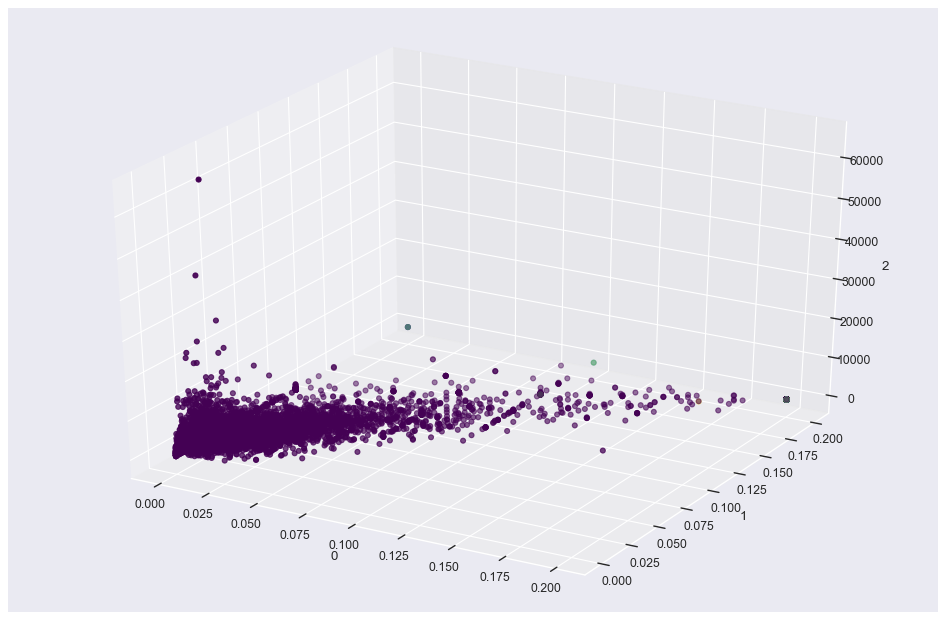

In [64]:
from sklearn.cluster import DBSCAN
matrix=x.as_matrix()
model = DBSCAN(eps=0.1, min_samples=20)
model.fit(matrix)
dbs_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(matrix[:,6],matrix[:,7],matrix[:,5],c=dbs_labels, cmap='viridis')

xLabel = ax.set_xlabel('0', linespacing=3.2)
yLabel = ax.set_ylabel('1', linespacing=3.1)
zLabel = ax.set_zlabel('2', linespacing=3.4)
#Internal Cluster Validation
print("DB for DBSCAN:"+ str(davies_bouldin_score(matrix, dbs_labels))) 
print("Silhoutte Score for DBSCAN:"+ str(silhouette_score(matrix, dbs_labels))) 
print("Calinski Score for DBSCAN:"+ str(metrics.calinski_harabasz_score(matrix, dbs_labels)))
# External Cluster Validation

print("Adjusted mutual information score:"+ str(adjusted_mutual_info_score(dbs_labels, Y)))
print("Homogeneity completeness v measure:"+str(metrics.homogeneity_completeness_v_measure(dbs_labels, Y)))

labels_unique=np.unique(dbs_labels)
n_clusters_=len(labels_unique)
#print the labels of each data 
print("Number of estimated clusters : %d" % n_clusters_)

print("DBSCAN")

## vii) Affinity Propagation

In [65]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import AffinityPropagation
from sklearn.metrics.pairwise import euclidean_distances

sns.set()
x1=x.head(500).copy()
matrix=x1.as_matrix()

preference=euclidean_distances(matrix,matrix).max()
afp=AffinityPropagation(preference=preference)
clustering=afp.fit(matrix)
afp.get_params()

C:\Users\Hassan Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


{'affinity': 'euclidean',
 'convergence_iter': 15,
 'copy': True,
 'damping': 0.5,
 'max_iter': 200,
 'preference': 6956.525266013798,
 'verbose': False}

DB for Affinity Propagation:2.466791136639795e-07
Silhoutte Score for Affinity Propagation:0.10999999957853152
Calinski Score for Affinity Propagation:2.151722838801212e+38
Adjusted mutual information score:0.0030892621030173878
Homogeneity completeness v measure:(0.03720029938052166, 1.0000000000000024, 0.0717321416176604)
Number of estimated clusters : 454
Affinity Propagation


C:\Users\Hassan Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


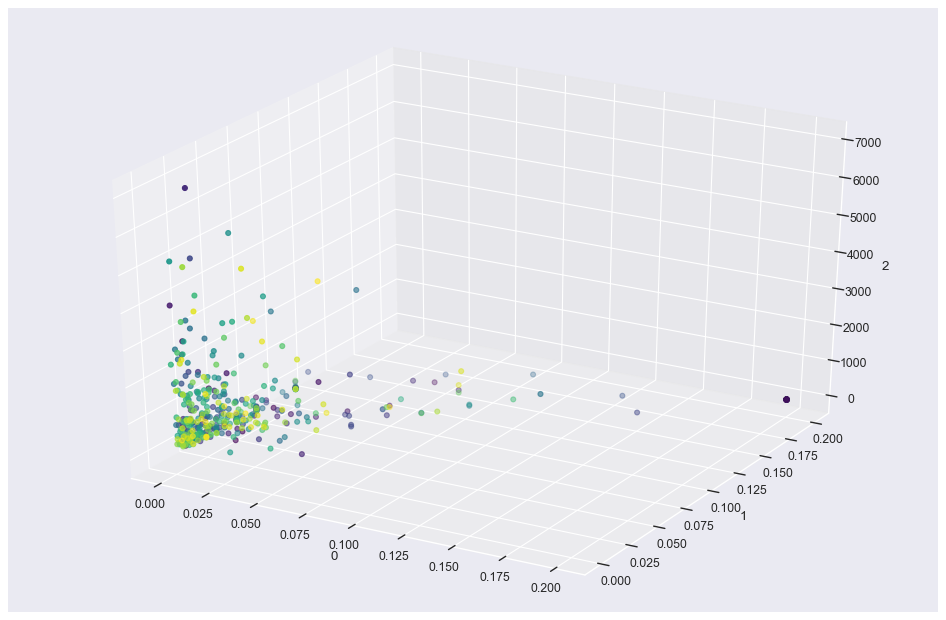

In [66]:
afp_labels=afp.predict(matrix)
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(matrix[:,6],matrix[:,7],matrix[:,5],c=afp_labels, cmap='viridis')

xLabel = ax.set_xlabel('0', linespacing=3.2)
yLabel = ax.set_ylabel('1', linespacing=3.1)
zLabel = ax.set_zlabel('2', linespacing=3.4)
#Internal Cluster Validation
db_af=davies_bouldin_score(matrix, afp_labels)
ss_af=silhouette_score(matrix, afp_labels)
ch_af=metrics.calinski_harabasz_score(matrix, afp_labels)
print("DB for Affinity Propagation:"+ str(db_af)) 
print("Silhoutte Score for Affinity Propagation:"+ str(ss_af)) 
print("Calinski Score for Affinity Propagation:"+ str(ch_af))

# External Cluster Validation
ami_af=adjusted_mutual_info_score(afp_labels, Y.head(500))
hcvm_af=metrics.homogeneity_completeness_v_measure(afp_labels, Y.head(500))
print("Adjusted mutual information score:"+ str(ami_af))
print("Homogeneity completeness v measure:"+str(hcvm_af))

labels_unique=np.unique(afp_labels)
n_clusters_=len(labels_unique)
#print the labels of each data 
print("Number of estimated clusters : %d" % n_clusters_)

print("Affinity Propagation")

## viii) OPTICS

C:\Users\Hassan Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


DB for OPTICS:2.1617073613238573
Silhoutte Score for OPTICS:-0.139625806784173
Calinski Score for OPTICS:23.820024848932928
Adjusted mutual information score:0.013036232931136782
Homogeneity completeness v measure:(0.016505902543919787, 0.07017200110179973, 0.026725432037034206)
Number of estimated clusters : 4
OPTICS


C:\Users\Hassan Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


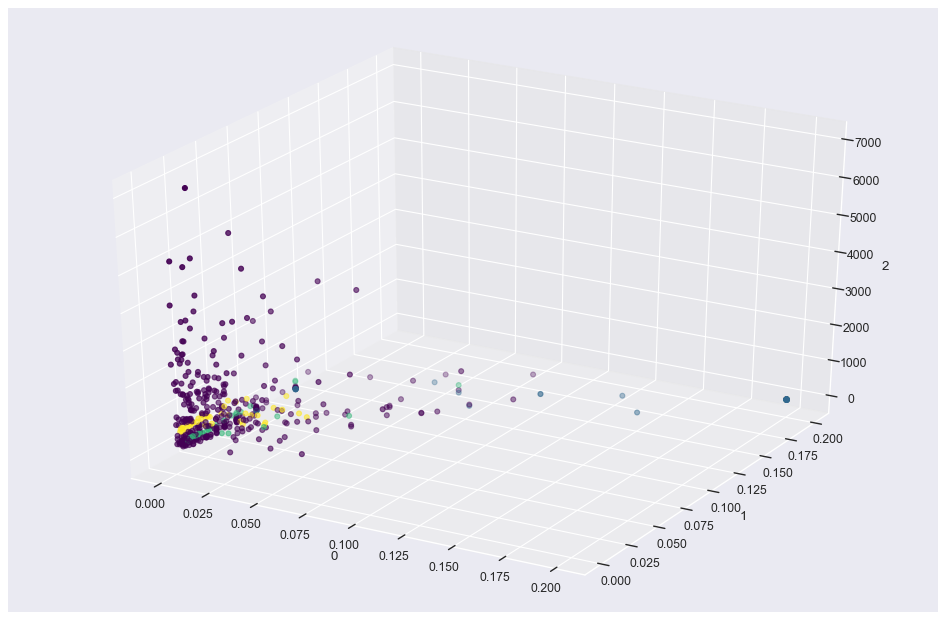

In [67]:
from sklearn.cluster import OPTICS

x1=x.head(500).copy()
matrix=x1.as_matrix()

model = OPTICS(min_samples=20, max_eps=np.inf, metric='minkowski', p=2, metric_params=None, cluster_method='xi', 
               xi=0.05, predecessor_correction=True, min_cluster_size=None, algorithm='auto')
model.fit(matrix)
op_labels = model.labels_
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(matrix[:,6],matrix[:,7],matrix[:,5],c=op_labels, cmap='viridis')

xLabel = ax.set_xlabel('0', linespacing=3.2)
yLabel = ax.set_ylabel('1', linespacing=3.1)
zLabel = ax.set_zlabel('2', linespacing=3.4)

#Internal Cluster Validation

db_op=davies_bouldin_score(matrix, op_labels)
ss_op=silhouette_score(matrix, op_labels)
ch_op=metrics.calinski_harabasz_score(matrix, op_labels)
print("DB for OPTICS:"+ str(db_op)) 
print("Silhoutte Score for OPTICS:"+ str(ss_op)) 
print("Calinski Score for OPTICS:"+ str(ch_op))

# External Cluster Validation

ami_op=adjusted_mutual_info_score(op_labels, Y.head(500))
hcvm_op=metrics.homogeneity_completeness_v_measure(op_labels, Y.head(500))
print("Adjusted mutual information score:"+ str(ami_op))
print("Homogeneity completeness v measure:"+str(hcvm_op))

labels_unique=np.unique(op_labels)
n_clusters_=len(labels_unique)
#print the labels of each data 
print("Number of estimated clusters : %d" % n_clusters_)


print("OPTICS")

# 5- Comparasion Table

In [68]:
matrix=x.as_matrix()

# All Alsogirthms

algos1=["K-Means","MiniBatch K-Means","Meanshift","Gaussian Mixture Model","DBSCAN","Affinity Propagation","OPTICS"]

# Davies Bouldin Score
db=[davies_bouldin_score(matrix,kmeans_labels),davies_bouldin_score(matrix,mkmeans_labels),davies_bouldin_score(matrix,ms_labels),
    davies_bouldin_score(matrix,gmm_labels),davies_bouldin_score(matrix,dbs_labels),db_af,db_op]

# Silhouette Score

ss=[silhouette_score(matrix,kmeans_labels),silhouette_score(matrix,mkmeans_labels),silhouette_score(matrix,ms_labels),
    silhouette_score(matrix,gmm_labels),silhouette_score(matrix,dbs_labels),ss_af,ss_op]

# Calinski Harabasz Score

ch=[metrics.calinski_harabasz_score(matrix,kmeans_labels),metrics.calinski_harabasz_score(matrix,mkmeans_labels),
    metrics.calinski_harabasz_score(matrix,ms_labels),metrics.calinski_harabasz_score(matrix,gmm_labels),
   metrics.calinski_harabasz_score(matrix,dbs_labels),ch_af,ch_op]

# Adjusted Mutual Information Score

ami=[adjusted_mutual_info_score(kmeans_labels,Y),adjusted_mutual_info_score(mkmeans_labels,Y),adjusted_mutual_info_score(ms_labels,Y),
    adjusted_mutual_info_score(gmm_labels,Y),adjusted_mutual_info_score(dbs_labels,Y),ami_af,ami_op]

# Homogeneity Completeness V Measure

hcvm=[metrics.homogeneity_completeness_v_measure(kmeans_labels, Y),metrics.homogeneity_completeness_v_measure(mkmeans_labels, Y),
     metrics.homogeneity_completeness_v_measure(ms_labels, Y),metrics.homogeneity_completeness_v_measure(gmm_labels, Y),
     metrics.homogeneity_completeness_v_measure(dbs_labels, Y),hcvm_af,hcvm_op]


C:\Users\Hassan Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Hassan Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [69]:
comp1={"Algorithms":algos1,"Davies Bouldin":db,"Silhouette Score":ss,"Calinski Harabasz Score":ch,
       "Adjusted Mutual Information Score":ami,"Homogeneity Completeness V Measure":hcvm}
compdf1=pd.DataFrame(comp1)
display(compdf1.sort_values(by=["Davies Bouldin"], ascending=True))


,Algorithms,Davies Bouldin,Silhouette Score,Calinski Harabasz Score,Adjusted Mutual Information Score,Homogeneity Completeness V Measure
5,Affinity Propagation,2.466791e-07,0.110000,2.151723e+38,0.003089,"(0.03720029938052166, 1.0000000000000024, 0.07..."
2,Meanshift,2.033492e-01,0.939951,1.501036e+03,-0.000160,"(0.002471394346508589, 3.245145650834897e-05, ..."
1,MiniBatch K-Means,5.382996e-01,0.790566,1.377206e+04,0.012145,"(0.02200920453336021, 0.012238276667062684, 0...."
0,K-Means,5.560656e-01,0.781361,1.386202e+04,0.013315,"(0.021548520716109625, 0.01340828616179606, 0...."
4,DBSCAN,9.127482e-01,-0.272657,6.180751e+01,0.017489,"(0.033431998022842614, 0.017871504849864207, 0..."
3,Gaussian Mixture Model,1.581881e+00,0.369708,2.120440e+03,0.016165,"(0.016237782944307205, 0.020818319787413952, 0..."
6,OPTICS,2.161707e+00,-0.139626,2.382002e+01,0.013036,"(0.016505902543919787, 0.07017200110179973, 0...."


As you can see we have tabulated all the internal and external cluster validation metrics against each of the Algorithms.

## 6- Where does most of the customers visiting the website belonging to? (identify the regions)

To answer this question we are using ML clustering technique to analyse Cystomer segments. We are only taking 2 features at the time.

## i- Region vs Traffic Type

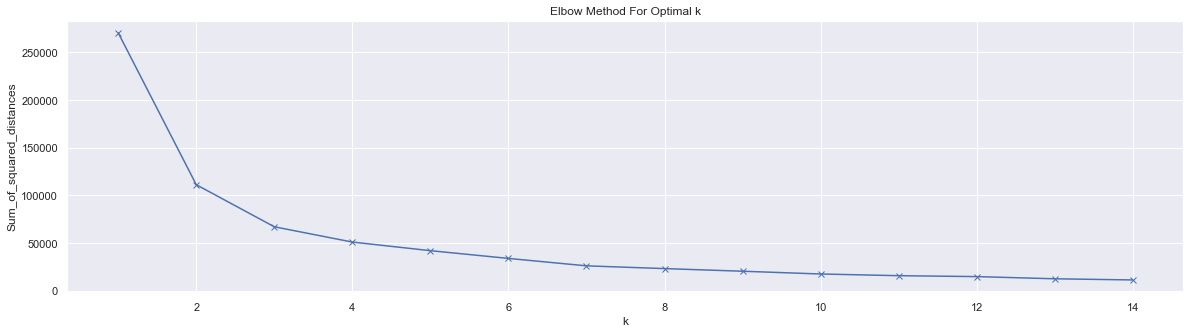

Sum of squared errors: [270535.9872523546, 111226.40607143239, 67091.11270959814, 51059.622004859404, 42025.70827271537, 33904.48096440807, 26116.181080587754, 23224.35471996266, 20460.341637785725, 17562.466530571568, 15792.685977008494, 14823.127642809579, 12528.460926499216, 11316.116755045463]


In [39]:
from sklearn.cluster import KMeans
matrix = osi.iloc[:, [13, 14]].values

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(matrix)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
print("Sum of squared errors:", Sum_of_squared_distances)

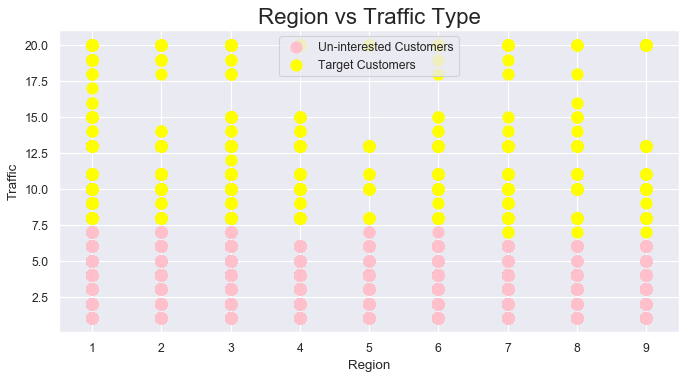

DB for MiniBatch K Means:0.6188410723382921
Silhoutte Score for MiniBatch K Means:0.6447177332903196
Calinski Score forMiniBatch K Means:17634.42543934742
Adjusted mutual information score:-6.878925727730259e-05
Homogeneity completeness v measure:(2.0084983327414377e-05, 2.129287723868956e-05, 2.0671299988965532e-05)
Mini Batch K-Means


C:\Users\Hassan Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [40]:
matrix = osi.iloc[:, [13, 14]].values

model = MiniBatchKMeans(n_clusters=2, init='k-means++', max_iter=100, batch_size=50)
model.fit(matrix)
mkmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(matrix[mkmeans_labels == 0, 0], matrix[mkmeans_labels == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(matrix[mkmeans_labels == 1, 0], matrix[mkmeans_labels == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.title('Region vs Traffic Type', fontsize = 20)

plt.xlabel('Region')
plt.ylabel('Traffic Type')
plt.legend()
plt.show()

print("DB for MiniBatch K Means:"+ str(davies_bouldin_score(matrix, mkmeans_labels))) 
print("Silhoutte Score for MiniBatch K Means:"+ str(silhouette_score(matrix, mkmeans_labels))) 
print("Calinski Score forMiniBatch K Means:"+ str(metrics.calinski_harabasz_score(matrix, mkmeans_labels)))

print("Adjusted mutual information score:"+ str(adjusted_mutual_info_score(mkmeans_labels, Y)))
print("Homogeneity completeness v measure:"+str(metrics.homogeneity_completeness_v_measure(mkmeans_labels, Y)))


print("Mini Batch K-Means")

* As illustrated by Elbow method only two customer segments were present and we called them "Non-Serious Customer" & "Serious Customer", so after applyinf ML algorithm we can clearly see that all the regions have non serious customers in traffic type 0-7 and most of the regions show that all other traffic types have Serious Customers

## ii- Adminstrative Duration vs Region

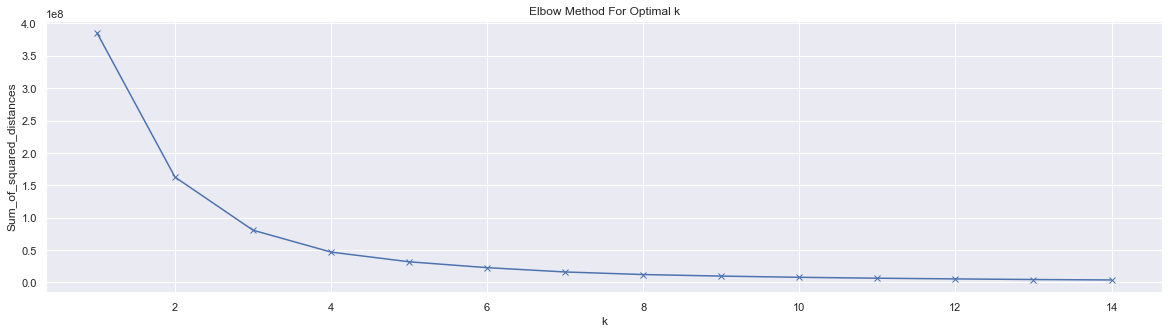

Sum of squared errors: [385279492.06923294, 162618994.32862478, 80655575.08116858, 46908393.88428649, 31930546.151333015, 22883933.4425325, 16218468.928481542, 12259459.945476925, 9860500.37387351, 7998436.586590659, 6607363.620341221, 5510456.930423715, 4554973.392225977, 3915262.977973648]


In [41]:
matrix = osi.iloc[:, [1, 13]].values
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(matrix)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
print("Sum of squared errors:", Sum_of_squared_distances)

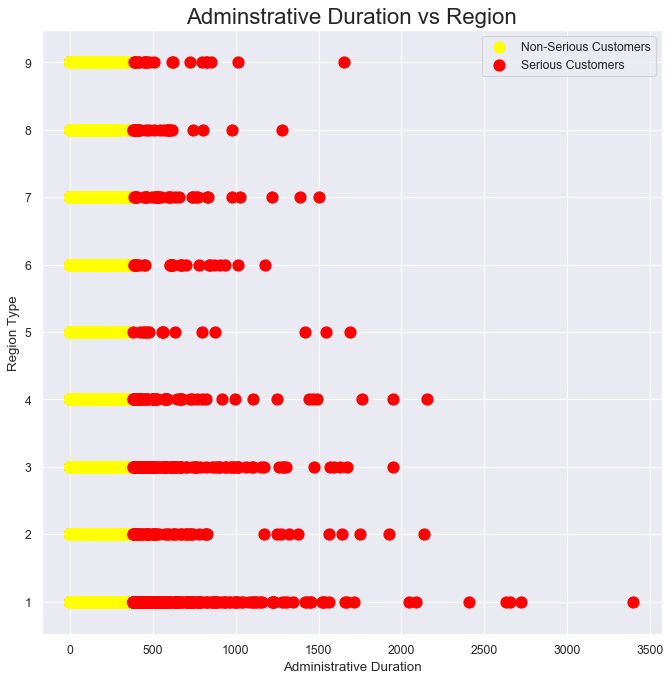

DB for MiniBatch K Means:0.5221433578071802
Silhoutte Score for MiniBatch K Means:0.8473645587258664
Calinski Score forMiniBatch K Means:16854.802351074693
Adjusted mutual information score:0.004062361902439829
Homogeneity completeness v measure:(0.009847506172217515, 0.004156332104799805, 0.005845469684261375)
Mini Batch K-Means


C:\Users\Hassan Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [42]:
matrix = osi.iloc[:, [1, 13]].values
model = MiniBatchKMeans(n_clusters=2, init='k-means++', max_iter=100, batch_size=50,random_state=42)
model.fit(matrix)
mkmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(matrix[mkmeans_labels == 0, 0], matrix[mkmeans_labels == 0, 1], s = 100, c = 'yellow', label = 'Non-Serious Customers')
plt.scatter(matrix[mkmeans_labels == 1, 0], matrix[mkmeans_labels == 1, 1], s = 100, c = 'red', label = 'Serious Customers')

plt.title('Adminstrative Duration vs Region', fontsize = 20)
plt.xlabel('Administrative Duration')
plt.ylabel('Region Type')
plt.legend()
plt.show()

print("DB for MiniBatch K Means:"+ str(davies_bouldin_score(matrix, mkmeans_labels))) 
print("Silhoutte Score for MiniBatch K Means:"+ str(silhouette_score(matrix, mkmeans_labels))) 
print("Calinski Score forMiniBatch K Means:"+ str(metrics.calinski_harabasz_score(matrix, mkmeans_labels)))

print("Adjusted mutual information score:"+ str(adjusted_mutual_info_score(mkmeans_labels, Y)))
print("Homogeneity completeness v measure:"+str(metrics.homogeneity_completeness_v_measure(mkmeans_labels, Y)))


print("Mini Batch K-Means")

* As illustrated by Elbow method only two customer segments were present and we called them "Non-Serious Customer" & "Serious Customer", so after applying ML algorithm we can clearly see that almost all regions have non serious customers with Administrative duration less than 500.

##  iii- Informational Duration vs Region

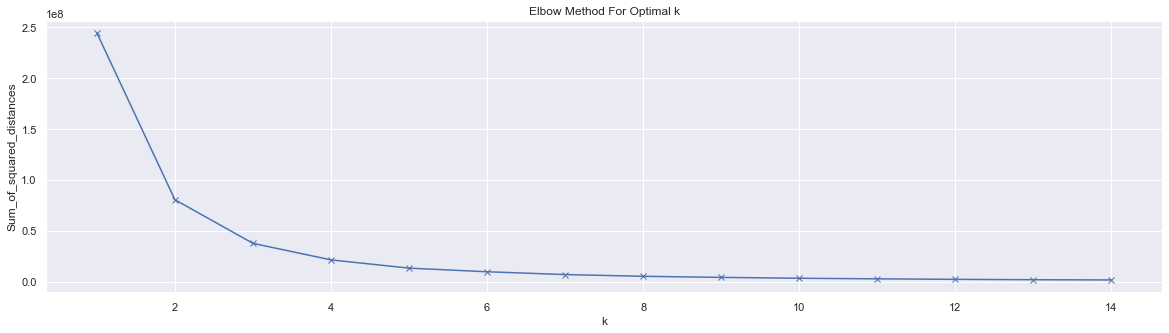

Sum of squared errors: [244299874.83389455, 80384717.91179433, 37517133.66409857, 21265140.56345822, 13171704.460231777, 9591540.636850411, 6841839.106654959, 5143539.633170096, 4072713.393490055, 3217942.9836713215, 2648915.0306525617, 2142803.562551089, 1787287.3631878898, 1556682.1724775254]


In [43]:
matrix = osi.iloc[:, [3, 13]].values
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(matrix)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
print("Sum of squared errors:", Sum_of_squared_distances)

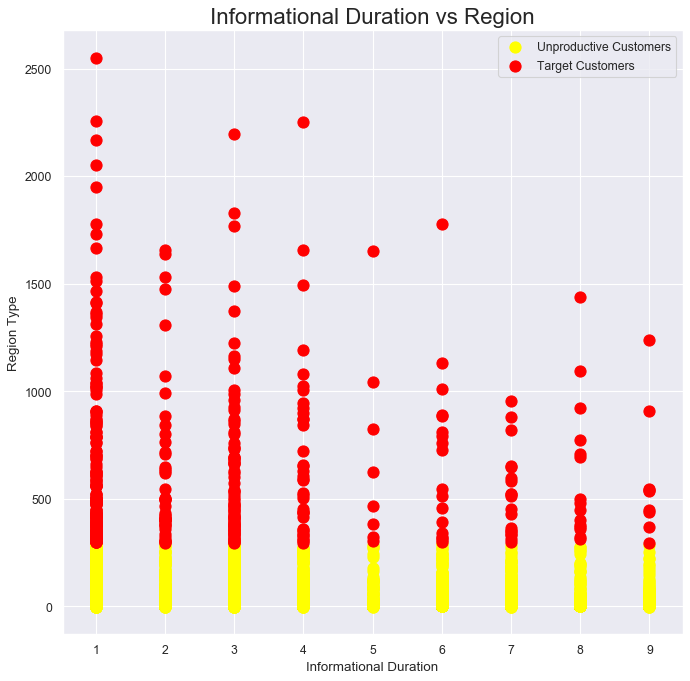

DB for MiniBatch K Means:0.49726916618870187
Silhoutte Score for MiniBatch K Means:0.9321102878891377
Calinski Score forMiniBatch K Means:23237.345659263054
Adjusted mutual information score:0.0036474626138259325
Homogeneity completeness v measure:(0.01121779637508491, 0.003741542257631876, 0.0056114591968785855)
Mini Batch K-Means


C:\Users\Hassan Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [44]:
matrix = osi.iloc[:, [3, 13]].values
model = MiniBatchKMeans(n_clusters=2, init='k-means++', max_iter=100, batch_size=50,random_state=42)
model.fit(matrix)
mkmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(matrix[mkmeans_labels == 0, 1], matrix[mkmeans_labels == 0, 0], s = 100, c = 'yellow', label = 'Unproductive Customers')
plt.scatter(matrix[mkmeans_labels == 1, 1], matrix[mkmeans_labels == 1, 0], s = 100, c = 'red', label = 'Target Customers')

plt.title('Informational Duration vs Region', fontsize = 20)
plt.xlabel('Informational Duration')
plt.ylabel('Region Type')
plt.legend()
plt.show()

print("DB for MiniBatch K Means:"+ str(davies_bouldin_score(matrix, mkmeans_labels))) 
print("Silhoutte Score for MiniBatch K Means:"+ str(silhouette_score(matrix, mkmeans_labels))) 
print("Calinski Score forMiniBatch K Means:"+ str(metrics.calinski_harabasz_score(matrix, mkmeans_labels)))

print("Adjusted mutual information score:"+ str(adjusted_mutual_info_score(mkmeans_labels, Y)))
print("Homogeneity completeness v measure:"+str(metrics.homogeneity_completeness_v_measure(mkmeans_labels, Y)))


print("Mini Batch K-Means")

* As illustrated by Elbow method only two customer segments were present and we called them "Non-Serious Customer" & "Serious Customer", so after applying ML algorithm we can clearly see that almost all regions have non serious customers with Informational duration less than 250.

## iv- Product Related Duration vs Region

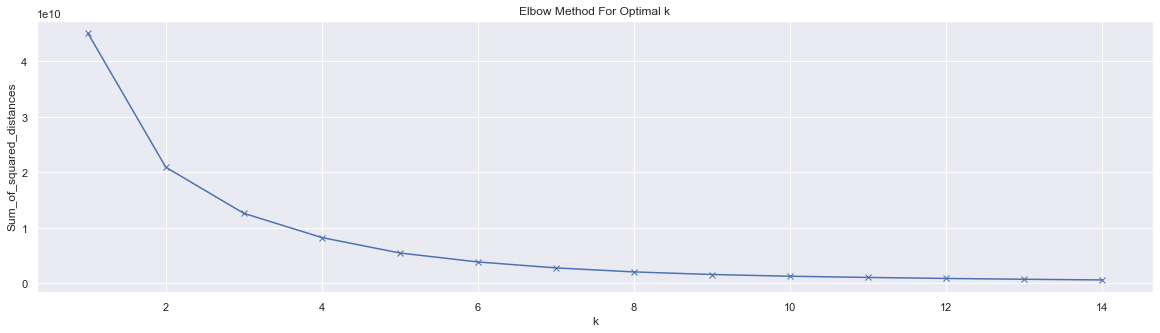

Sum of squared errors: [45132355353.614685, 20922802345.658016, 12609364812.08392, 8241901990.640925, 5460922555.146396, 3847239389.700862, 2775717900.617993, 2050474128.8969524, 1585610322.8228838, 1271864609.9010406, 1058116552.9253579, 874922702.0468171, 728851301.4020969, 604536763.2935845]


In [45]:
matrix = osi.iloc[:, [5, 13]].values
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(matrix)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
print("Sum of squared errors:", Sum_of_squared_distances)

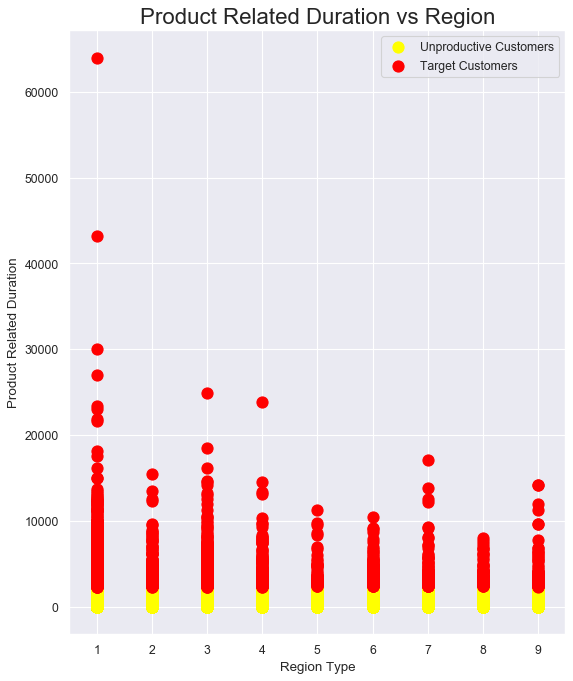

DB for MiniBatch K Means:0.6122689214270681
Silhoutte Score for MiniBatch K Means:0.7424904711201904
Calinski Score forMiniBatch K Means:12812.811778047484
Adjusted mutual information score:0.016282001364154704
Homogeneity completeness v measure:(0.017403415650703722, 0.01637469021772138, 0.016873387816390566)
Mini Batch K-Means


C:\Users\Hassan Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [46]:
matrix = osi.iloc[:, [5, 13]].values
model = MiniBatchKMeans(n_clusters=2, init='k-means++', max_iter=100, batch_size=50,random_state=42)
model.fit(matrix)
mkmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(matrix[mkmeans_labels == 0, 1], matrix[mkmeans_labels == 0, 0], s = 100, c = 'yellow', label = 'Unproductive Customers')
plt.scatter(matrix[mkmeans_labels == 1, 1], matrix[mkmeans_labels == 1, 0], s = 100, c = 'red', label = 'Target Customers')

plt.title('Product Related Duration vs Region', fontsize = 20)
plt.xlabel('Region Type')
plt.ylabel('Product Related Duration')
plt.legend()
plt.show()

print("DB for MiniBatch K Means:"+ str(davies_bouldin_score(matrix, mkmeans_labels))) 
print("Silhoutte Score for MiniBatch K Means:"+ str(silhouette_score(matrix, mkmeans_labels))) 
print("Calinski Score forMiniBatch K Means:"+ str(metrics.calinski_harabasz_score(matrix, mkmeans_labels)))

print("Adjusted mutual information score:"+ str(adjusted_mutual_info_score(mkmeans_labels, Y)))
print("Homogeneity completeness v measure:"+str(metrics.homogeneity_completeness_v_measure(mkmeans_labels, Y)))


print("Mini Batch K-Means")

* As illustrated by Elbow method only two customer segments were present and we called them "Non-Serious Customer" & "Serious Customer", so after applying ML algorithm we can clearly see that almost all regions have non serious customers with Product Related duration less than 100.

## v- Page Values vs Region

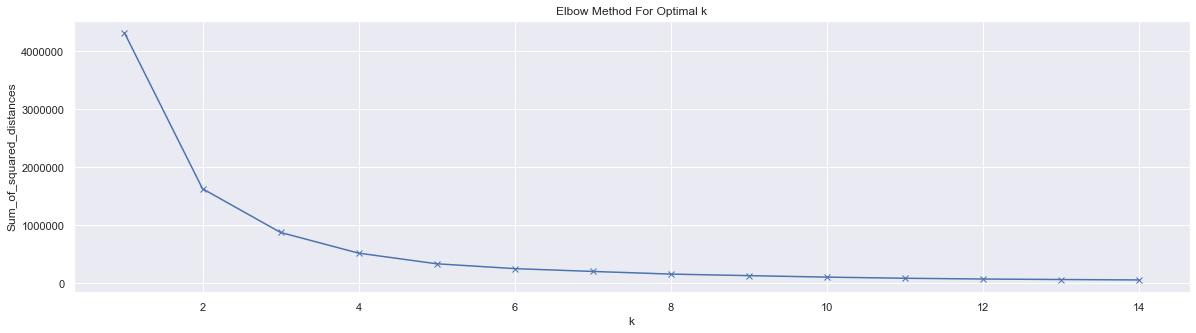

Sum of squared errors: [4321455.969103977, 1632783.3023499541, 878548.2551259432, 521788.1637793206, 338196.2831455613, 254527.0551192973, 206130.30465508462, 160289.1436825458, 133655.1842081525, 108119.68950414039, 88400.53415497493, 75408.10189799785, 66698.59999973376, 59300.697460231204]


In [71]:
matrix = osi.iloc[:, [8, 13]].values
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(matrix)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
print("Sum of squared errors:", Sum_of_squared_distances)

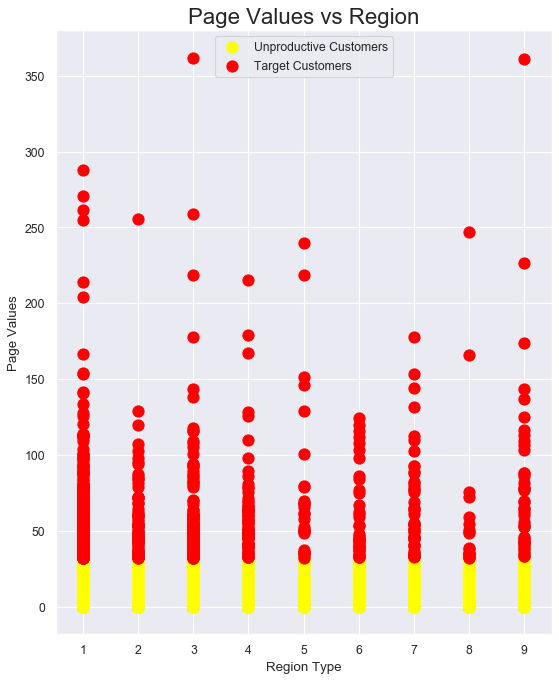

DB for MiniBatch K Means:0.48232926144719157
Silhoutte Score for MiniBatch K Means:0.8654499152855754
Calinski Score forMiniBatch K Means:20201.90721875864
Adjusted mutual information score:0.15380092325689768
Homogeneity completeness v measure:(0.28238869300628633, 0.1538807173479064, 0.19920798304637516)
Mini Batch K-Means


C:\Users\Hassan Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [72]:
matrix = osi.iloc[:, [8, 13]].values
model = MiniBatchKMeans(n_clusters=2, init='k-means++', max_iter=100, batch_size=50,random_state=42)
model.fit(matrix)
mkmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(matrix[mkmeans_labels == 0, 1], matrix[mkmeans_labels == 0, 0], s = 100, c = 'yellow', label = 'Unproductive Customers')
plt.scatter(matrix[mkmeans_labels == 1, 1], matrix[mkmeans_labels == 1, 0], s = 100, c = 'red', label = 'Target Customers')

plt.title('Page Values vs Region', fontsize = 20)
plt.xlabel('Region Type')
plt.ylabel('Page Values')
plt.legend()
plt.show()

print("DB for MiniBatch K Means:"+ str(davies_bouldin_score(matrix, mkmeans_labels))) 
print("Silhoutte Score for MiniBatch K Means:"+ str(silhouette_score(matrix, mkmeans_labels))) 
print("Calinski Score forMiniBatch K Means:"+ str(metrics.calinski_harabasz_score(matrix, mkmeans_labels)))

print("Adjusted mutual information score:"+ str(adjusted_mutual_info_score(mkmeans_labels, Y)))
print("Homogeneity completeness v measure:"+str(metrics.homogeneity_completeness_v_measure(mkmeans_labels, Y)))


print("Mini Batch K-Means")

As illustrated by Elbow method only two customer segments were present and we called them "Non-Serious Customer" & "Serious Customer", so after applying ML algorithm we can clearly see that almost all regions have non serious customers with Page Values less than 25.

# 7- How does longer duration spent on the website affect the bounce rate?

## i-Administrative Duration vs Bounce Rates

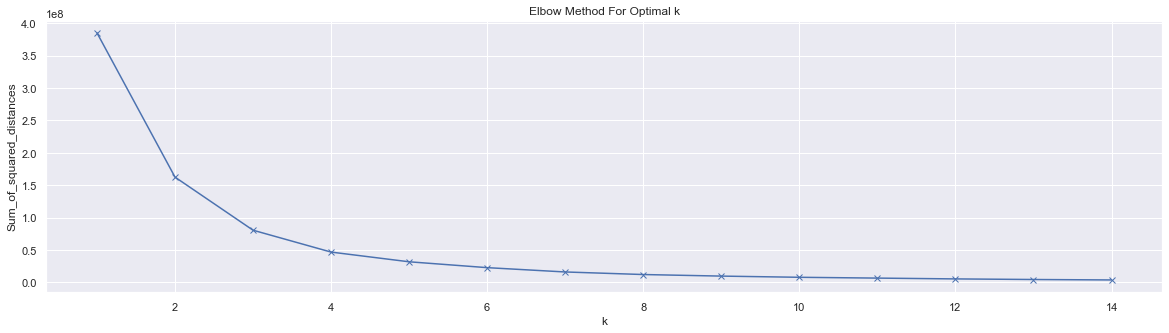

Sum of squared errors: [385208455.78854847, 162547958.0587761, 80583912.06694269, 46837399.03609781, 31854922.54136809, 22817054.320631254, 16147827.129863087, 12190927.519446852, 9778685.915634692, 7936170.50266624, 6686575.170696702, 5433584.419733537, 4518381.135612718, 3836701.8301773737]


In [48]:
matrix = osi.iloc[:, [1, 6]].values
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(matrix)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
print("Sum of squared errors:", Sum_of_squared_distances)

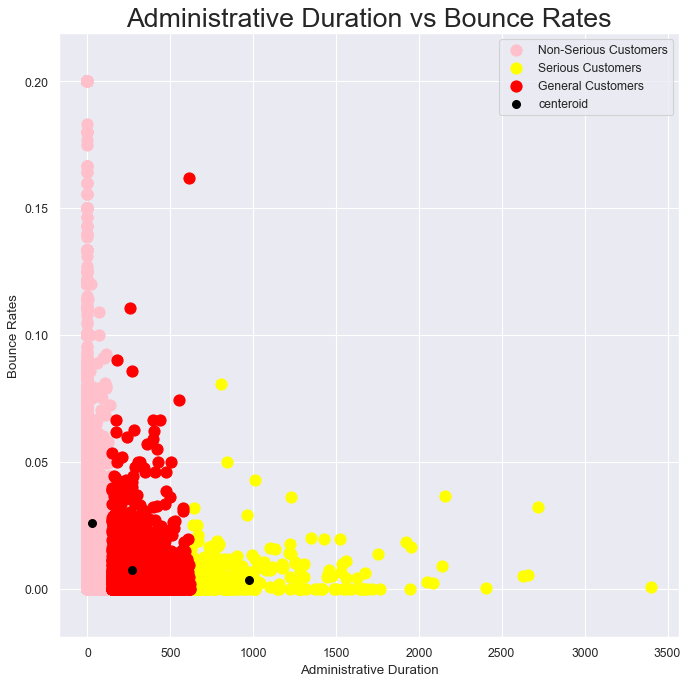

DB for MiniBatch K Means:0.5297305969236704
Silhoutte Score for MiniBatch K Means:0.7590657502244949
Calinski Score forMiniBatch K Means:22565.380432425798
Adjusted mutual information score:0.009132664193397378
Homogeneity completeness v measure:(0.009290418999776794, 0.01102037691899833, 0.010081723977967888)
Mini Batch K-Means


C:\Users\Hassan Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [49]:
matrix = osi.iloc[:, [1, 6]].values
model = MiniBatchKMeans(n_clusters=3, init='k-means++', max_iter=100, batch_size=50,random_state=42)
model.fit(matrix)
mkmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(matrix[mkmeans_labels == 0, 0], matrix[mkmeans_labels == 0, 1], s = 100, c = 'pink', label = 'Non-Serious Customers')
plt.scatter(matrix[mkmeans_labels == 1, 0], matrix[mkmeans_labels == 1, 1], s = 100, c = 'yellow', label = 'Serious Customers')
plt.scatter(matrix[mkmeans_labels == 2, 0], matrix[mkmeans_labels == 2, 1], s = 100, c = 'red', label = 'General Customers')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centeroid')

plt.title('Administrative Duration vs Bounce Rates', fontsize = 24)
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

print("DB for MiniBatch K Means:"+ str(davies_bouldin_score(matrix, mkmeans_labels))) 
print("Silhoutte Score for MiniBatch K Means:"+ str(silhouette_score(matrix, mkmeans_labels))) 
print("Calinski Score forMiniBatch K Means:"+ str(metrics.calinski_harabasz_score(matrix, mkmeans_labels)))

print("Adjusted mutual information score:"+ str(adjusted_mutual_info_score(mkmeans_labels, Y)))
print("Homogeneity completeness v measure:"+str(metrics.homogeneity_completeness_v_measure(mkmeans_labels, Y)))


print("Mini Batch K-Means")

* As illustrated by Elbow method only three customer segments were present and we called them "Non-Serious Customer" & "Serious Customer" and "General Customers" so after applying ML algorithm we can clearly see that bounce rates are much higher when the administrative Duration is lesser.

## ii-Informational Duration vs Bounce Rates

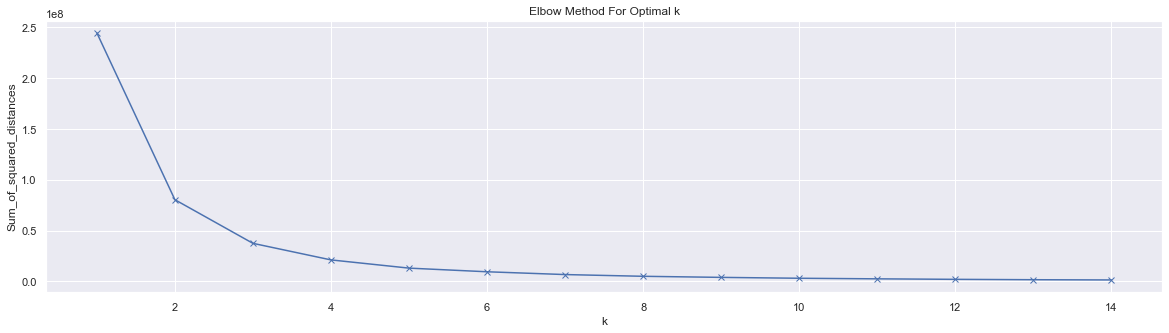

Sum of squared errors: [244228838.55321008, 80313701.62054852, 37446086.62362029, 21170410.49151005, 13098054.46826194, 9515149.477636628, 6772578.982446675, 5072548.821057047, 4009333.7795009194, 3146976.5086555886, 2574665.75309727, 2081396.8877234862, 1710115.2678723314, 1484890.7061912818]


In [50]:
matrix = osi.iloc[:, [3, 6]].values
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(matrix)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
print("Sum of squared errors:", Sum_of_squared_distances)

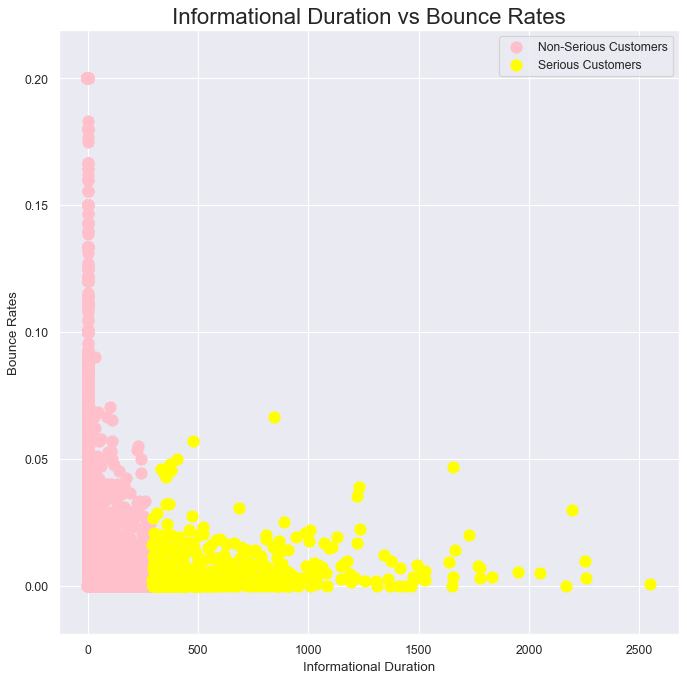

In [51]:
matrix = osi.iloc[:, [3, 6]].values
model = MiniBatchKMeans(n_clusters=2, init='k-means++', max_iter=100, batch_size=50,random_state=42)
model.fit(matrix)
mkmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(matrix[mkmeans_labels == 0, 0], matrix[mkmeans_labels == 0, 1], s = 100, c = 'pink', label = 'Non-Serious Customers')
plt.scatter(matrix[mkmeans_labels == 1, 0], matrix[mkmeans_labels == 1, 1], s = 100, c = 'yellow', label = 'Serious Customers')

plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

* As illustrated by Elbow method only two customer segments were present and we called them "Non-Serious Customer" & "Serious Customer", so after applying ML algorithm we can clearly see that bounce rates are much higher when the Informational Duration is lesser.

## iii-Product Related Duration vs Bounce Rates

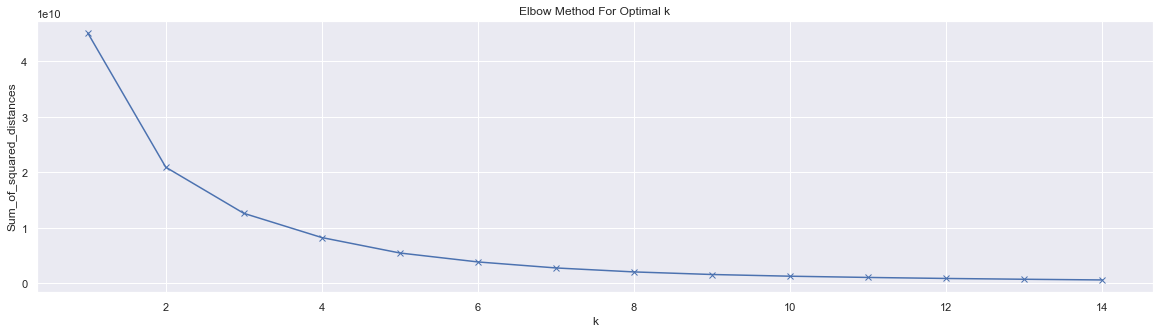

Sum of squared errors: [45132284317.334, 20922731368.898903, 12609322685.756401, 8241593863.935974, 5460851621.978679, 3850165607.358508, 2766452396.756963, 2050272257.3959904, 1585539400.4343593, 1278795576.314872, 1055636352.5691408, 872921843.4892104, 728828253.3575099, 604410095.7644658]


In [52]:
matrix = osi.iloc[:, [5, 6]].values
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(matrix)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
print("Sum of squared errors:", Sum_of_squared_distances)

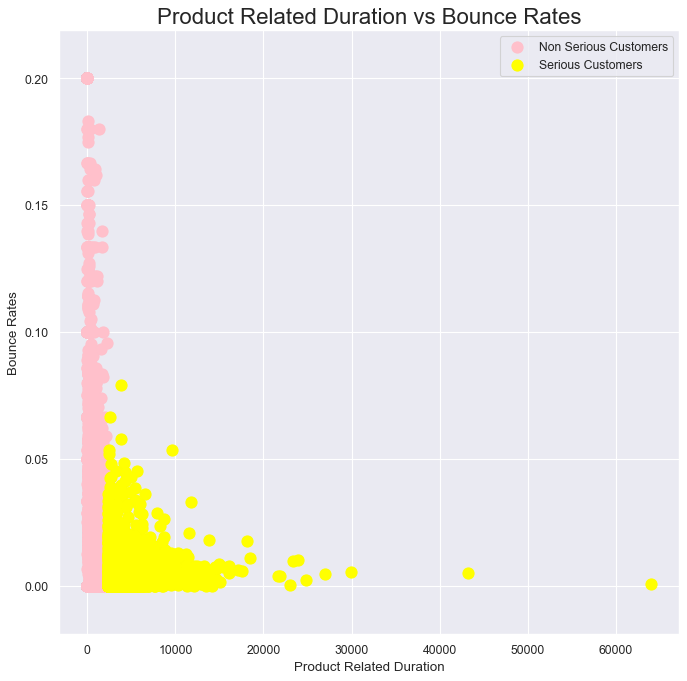

In [53]:
matrix = osi.iloc[:, [5, 6]].values
model = MiniBatchKMeans(n_clusters=2, init='k-means++', max_iter=100, batch_size=50,random_state=42)
model.fit(matrix)
mkmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(matrix[mkmeans_labels == 0, 0], matrix[mkmeans_labels == 0, 1], s = 100, c = 'pink', label = 'Non Serious Customers')
plt.scatter(matrix[mkmeans_labels == 1, 0], matrix[mkmeans_labels == 1, 1], s = 100, c = 'yellow', label = 'Serious Customers')

plt.title('Product Related Duration vs Bounce Rates', fontsize = 20)
plt.xlabel('Product Related Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

* As illustrated by Elbow method only two customer segments were present and we called them "Non-Serious Customer" & "Serious Customer", so after applying ML algorithm we can clearly see that bounce rates are much higher when the Product Relatd Duration is lesser.

# 8-How would you differentiate between serious and non-serious customers?

By analysing all of the above clusters we classified them as Serious and Non Serious Customers.

* Customers with High Administrative, Informational and Product Related Duration are our Target and Serious Customers.

* Customers with Traffic Type greater than 8 are our target customers

* Customers with greater bounce rates are our Non Serious Customers

* Customers from Region 9 has very low exit rate so they are in our target segment

* New and Other Custmores also have very low exit rates so they are also in our target Segment

# 9-How does exit rate affect revenue? 

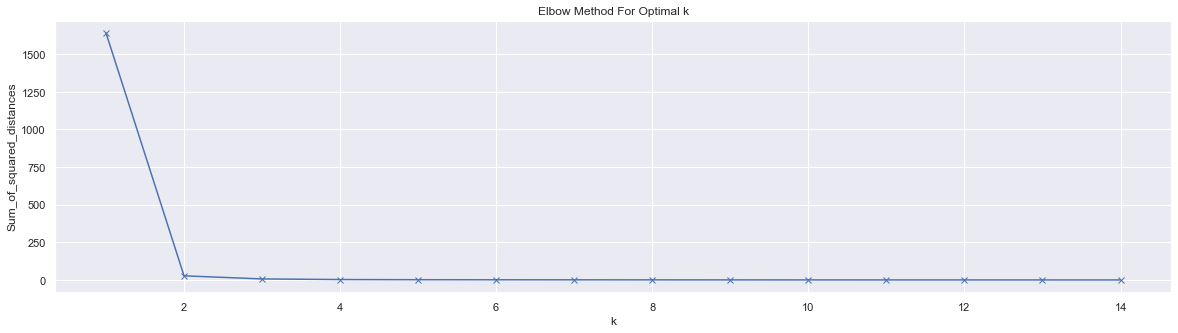

Sum of squared errors: [1641.4124010970854, 27.75930111097104, 6.948311769749202, 2.9712683757692386, 1.7707126977562295, 1.3171212347604107, 1.0415800206287495, 0.7671383375327395, 0.5925228365817388, 0.49209829861047844, 0.39982495509245963, 0.3461667582040607, 0.2992004910898095, 0.24653236342727783]


In [55]:
matrix = osi.iloc[:, [7, 17]].values
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(matrix)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
print("Sum of squared errors:", Sum_of_squared_distances)

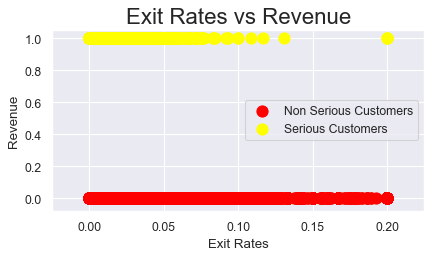

In [56]:
matrix = osi.iloc[:, [7, 17]].values
model = MiniBatchKMeans(n_clusters=2, init='k-means++', max_iter=100, batch_size=50,random_state=42)
model.fit(matrix)
mkmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(6, 3), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(matrix[mkmeans_labels == 0, 0], matrix[mkmeans_labels == 0, 1], s = 100, c = 'Red', label = 'Non Serious Customers')
plt.scatter(matrix[mkmeans_labels == 1, 0], matrix[mkmeans_labels == 1, 1], s = 100, c = 'yellow', label = 'Serious Customers')

plt.title('Exit Rates vs Revenue', fontsize = 20)
plt.xlabel('Exit Rates')
plt.ylabel('Revenue')
plt.legend()
plt.show()

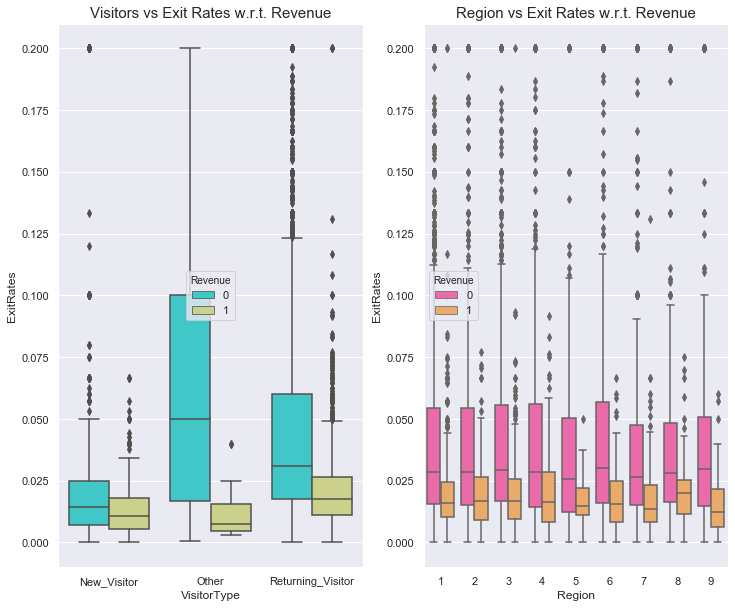

In [57]:
# visitor type vs exit rates w.r.t revenue
plt.rcParams['figure.figsize'] = (12, 10)
plt.subplot(1, 2, 1)
sns.boxplot(x = osi['VisitorType'], y = osi['ExitRates'], hue = osi['Revenue'], palette = 'rainbow')
plt.title('Visitors vs Exit Rates w.r.t. Revenue', fontsize = 15)
#region vs exit rates w.r.t. revenue
plt.subplot(1, 2, 2)
sns.boxplot(x = osi['Region'], y = osi['ExitRates'], hue = osi['Revenue'], palette = 'spring')
plt.title('Region vs Exit Rates w.r.t. Revenue', fontsize = 15)
plt.show()

* As we can see that New and Other Visitor Types have very low exit rate so they can be categorized as serious or target customers.
* Region 8 and 9 have the least exit rate so we can also classify them as serious or target customers

# 10-What is the effect of Traffic type on Revenue?

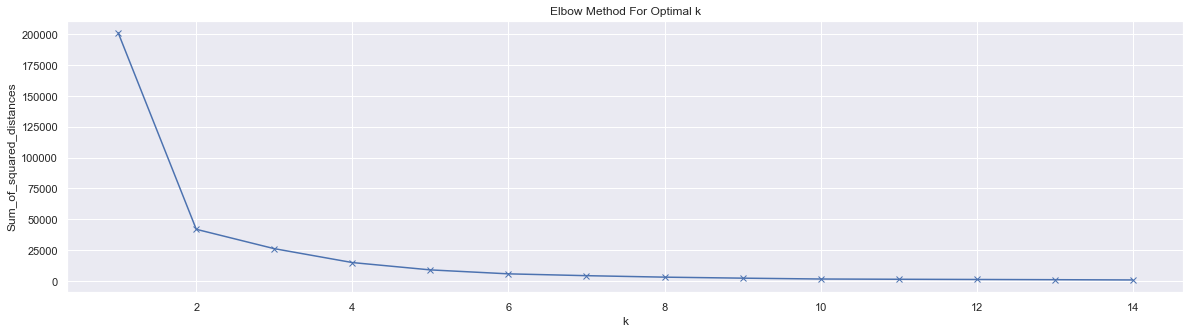

Sum of squared errors: [201083.23741474503, 41817.4663123232, 26111.753902591856, 14856.25351753473, 8904.651445175554, 5703.876595503565, 4217.826676578422, 3024.2397203790656, 2210.0894006739113, 1512.8064396687414, 1312.7036443576503, 1140.4671686174815, 963.2651047479474, 757.3254826604447]


In [74]:
matrix = osi.iloc[:, [14, 17]].values
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(matrix)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
print("Sum of squared errors:", Sum_of_squared_distances)

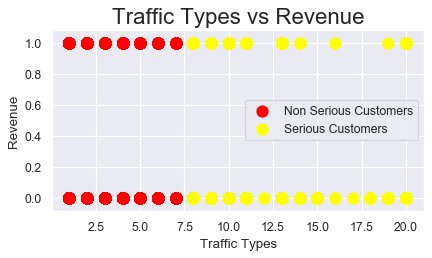

In [75]:
matrix = osi.iloc[:, [14, 17]].values
model = MiniBatchKMeans(n_clusters=2, init='k-means++', max_iter=100, batch_size=50,random_state=42)
model.fit(matrix)
mkmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(6, 3), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(matrix[mkmeans_labels == 0, 0], matrix[mkmeans_labels == 0, 1], s = 100, c = 'Red', label = 'Non Serious Customers')
plt.scatter(matrix[mkmeans_labels == 1, 0], matrix[mkmeans_labels == 1, 1], s = 100, c = 'yellow', label = 'Serious Customers')

plt.title('Traffic Types vs Revenue', fontsize = 20)
plt.xlabel('Traffic Types')
plt.ylabel('Revenue')
plt.legend()
plt.show()

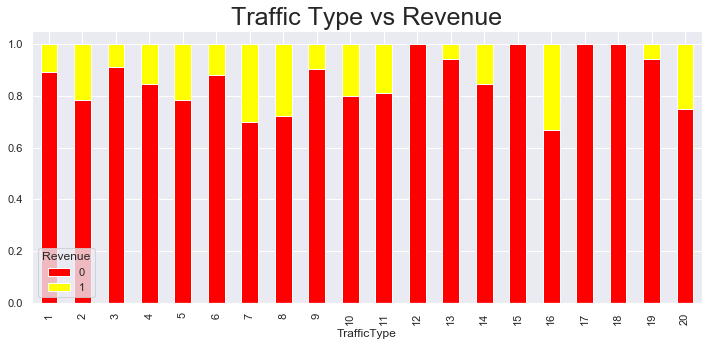

In [76]:
# Traffic Type vs Revenue
df = pd.crosstab(osi['TrafficType'], osi['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (12, 5), color = ['red', 'yellow'])
plt.title('Traffic Type vs Revenue', fontsize = 25)
plt.show()

* As we can see Traffic Type 6,7,8,10,11,16 & 20 are generating big revenue so the are classified as our target customers.

# Thank You